In [77]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pprint import pprint
from scipy.stats import linregress
import seaborn as sns


In [34]:

df = pd.read_csv("owid-energy-data.csv")

#clean the data set and drop and missing values for the energy consuption and green house gas emissions
df_cleaned = df.dropna(subset=["primary_energy_consumption", "greenhouse_gas_emissions"])
df_cleaned.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
124,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
125,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
126,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
127,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
128,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [35]:
#filter out data

single_countrydf= df_cleaned[["country", "year", "primary_energy_consumption", "greenhouse_gas_emissions"]]
single_countrydf.head()

,country,year,primary_energy_consumption,greenhouse_gas_emissions
124,Afghanistan,2000,5.914,0.12
125,Afghanistan,2001,4.664,0.15
126,Afghanistan,2002,4.428,0.12
127,Afghanistan,2003,5.208,0.22
128,Afghanistan,2004,4.810,0.18


In [36]:
#filter out the data that isnt actual countries
non_countries = ["World", "Asia", "Europe", "Africa", "North America", "South America", "Oceania", "ASEAN (Ember)", "Central & South America (EIA)", "Central African Republic", "Central America (EI)", "Central and South America (Shift)", "EU28 (Shift)" , "European Union (27)" "G7 (Ember)", "High-income countries", "Lower-middle-income countries", "Middle East (EIA)" "Middle East (Ember)", "Non-OPEC (EIA)", "OECD (EI)", "OPEC (Shift)", "Upper-middle-income countries"]
cleaned_version = single_countrydf[~single_countrydf["country"].isin(non_countries)]
cleaned_version.head()

,country,year,primary_energy_consumption,greenhouse_gas_emissions
124,Afghanistan,2000,5.914,0.12
125,Afghanistan,2001,4.664,0.15
126,Afghanistan,2002,4.428,0.12
127,Afghanistan,2003,5.208,0.22
128,Afghanistan,2004,4.810,0.18


In [37]:
#filter our the data based on the last 5 years
latest_year = single_countrydf["year"].max()
last_5_years = latest_year - 5
filtered_last_5_years = cleaned_version[cleaned_version["year"] > last_5_years]
filtered_last_5_years.head()

,country,year,primary_energy_consumption,greenhouse_gas_emissions
143,Afghanistan,2019,30.314,0.16
144,Afghanistan,2020,27.393,0.10
145,Afghanistan,2021,27.135,0.11
632,Albania,2019,33.296,0.12
633,Albania,2020,31.988,0.13


In [38]:
#  Now find the country that has the highest level of energy consumptions and greenhouse gas

highest_energy_country = (
    filtered_last_5_years.groupby("country")["primary_energy_consumption"].sum().idxmax()
)
highest_emissions_country = (
    filtered_last_5_years.groupby("country")["greenhouse_gas_emissions"].sum().idxmax()
)
highest_energy_data = filtered_last_5_years[
    filtered_last_5_years["country"] == highest_energy_country
]
highest_emissions_data = filtered_last_5_years[
    filtered_last_5_years["country"] == highest_emissions_country
]



print(f"Highest Energy Consumption Country: {highest_energy_country}")
print(highest_energy_data.to_string(index=False))
print(f"\nHighest Greenhouse Gas Emissions Country: {highest_emissions_country}")
print(highest_emissions_data.to_string(index=False))

Highest Energy Consumption Country: China
country  year  primary_energy_consumption  greenhouse_gas_emissions
  China  2019                   40188.543                   4649.25
  China  2020                   41493.711                   4716.12
  China  2021                   43847.004                   5110.79
  China  2022                   44516.312                   5183.77
  China  2023                   47427.562                   5508.48

Highest Greenhouse Gas Emissions Country: China
country  year  primary_energy_consumption  greenhouse_gas_emissions
  China  2019                   40188.543                   4649.25
  China  2020                   41493.711                   4716.12
  China  2021                   43847.004                   5110.79
  China  2022                   44516.312                   5183.77
  China  2023                   47427.562                   5508.48


Text(0, 0.5, 'Energy TWh')

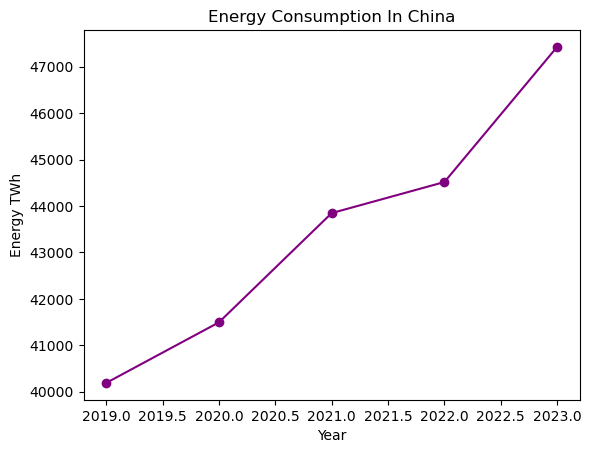

In [39]:
#make a linegraph to display data for energy consumption

plt.plot(highest_energy_data["year"], highest_energy_data["primary_energy_consumption"], 
         marker='o', linestyle='-', color='purple', label="Energy Consumption")
plt.title('Energy Consumption In China')
plt.xlabel('Year')
plt.ylabel('Energy TWh')

Text(0, 0.5, ' MtCO₂e')

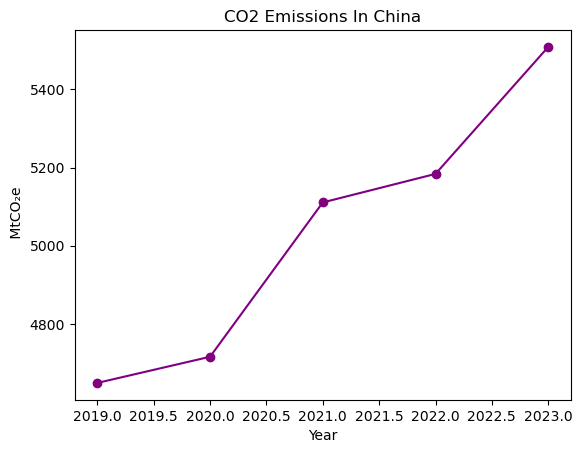

In [40]:
#make a linegraph to display data for green house gas emissions
plt.plot(highest_emissions_data["year"], highest_emissions_data["greenhouse_gas_emissions"], 
         marker='o', linestyle='-', color='purple', label="Energy Consumption")
plt.title('CO2 Emissions In China')
plt.xlabel('Year')
plt.ylabel(' MtCO₂e')

In [41]:
#Start extracting data from csv. Looking for data for a few different  countries
#.isin: Checks whether each value in the "country" column is present in the list selected_countries

selected_countries = ["China", "India", "Brazil", "Pakistan", "Mexico"]

new_df= df_cleaned[df_cleaned["country"].isin(selected_countries)]

latest_year = new_df["year"].max()
df_recent = new_df[new_df["year"] == latest_year]
df_final = df_recent[["country", "year", "primary_energy_consumption", "greenhouse_gas_emissions"]]
df_final.head()

,country,year,primary_energy_consumption,greenhouse_gas_emissions
3060,Brazil,2023,3853.715,70.14
4505,China,2023,47427.562,5508.48
9328,India,2023,10837.855,1403.98
12008,Mexico,2023,2348.044,179.23
15532,Pakistan,2023,936.701,70.96


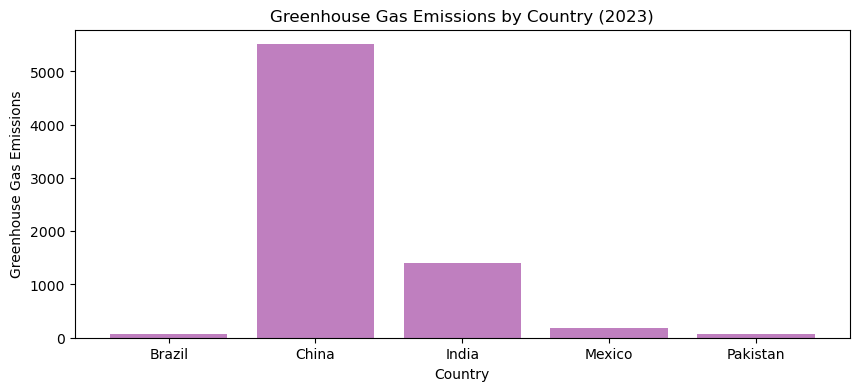

In [42]:
#create bar graph showing energy consuption by country and greenhouse gas emissions 

plt.figure(figsize=(10, 4))
plt.bar(df_final["country"], df_final["greenhouse_gas_emissions"], color='purple', alpha=0.5)
plt.xlabel("Country")
plt.ylabel("Greenhouse Gas Emissions")
plt.title("Greenhouse Gas Emissions by Country (2023)")
plt.show()

In [3]:
energy_data_raw_df=pd.read_csv("owid-energy-data.csv")

energy_data_raw_df=energy_data_raw_df.loc[(energy_data_raw_df["year"] >= 2018) & (energy_data_raw_df["year"] <= 2023)]

energy_data_raw_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
18,ASEAN (Ember),2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.647,NaN,NaN,NaN,NaN,NaN,3.47,NaN,0.327,NaN
19,ASEAN (Ember),2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.224,NaN,NaN,NaN,NaN,NaN,5.91,NaN,0.531,NaN
20,ASEAN (Ember),2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.826,NaN,NaN,NaN,NaN,NaN,5.79,NaN,0.526,NaN
21,ASEAN (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.130,NaN,NaN,NaN,NaN,NaN,7.63,NaN,0.666,NaN
22,ASEAN (Ember),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.086,NaN,NaN,NaN,NaN,NaN,13.09,NaN,1.086,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21807,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,NaN,NaN,NaN,NaN,12.374,...,0.353,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN
21808,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,NaN,NaN,NaN,NaN,6.382,...,0.298,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN
21809,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,NaN,NaN,NaN,NaN,0.000,...,0.236,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN
21810,Zimbabwe,2022,ZWE,16320539.0,2.590159e+10,NaN,NaN,NaN,NaN,6.127,...,0.336,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN


In [4]:
north_american_countries = [
    "United States", "Canada", "Mexico", "Guatemala", "Belize", "Honduras",
    "El Salvador", "Nicaragua", "Costa Rica", "Panama", "Bahamas", "Cuba",
    "Jamaica", "Haiti", "Dominican Republic"]


south_american_countries = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
    "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]

asian_countries=[ "China","Japan", "North Korea", "Mongolia", "Taiwan",]


In [5]:
North_American_Countries_df = energy_data_raw_df.loc[
    energy_data_raw_df["country"].isin(north_american_countries),
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation","fossil_fuel_consumption"]
]
North_American_Countries_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
1942,Bahamas,2018,401911.0,1.32,NaN,NaN,2.00,2.00,NaN
1943,Bahamas,2019,404563.0,1.32,NaN,NaN,2.01,2.01,NaN
1944,Bahamas,2020,406478.0,1.33,NaN,NaN,2.02,2.02,NaN
1945,Bahamas,2021,407920.0,1.34,NaN,NaN,2.03,2.03,NaN
1946,Bahamas,2022,409989.0,1.34,NaN,NaN,2.03,2.03,NaN
...,...,...,...,...,...,...,...,...,...
20488,United States,2019,334319680.0,1718.34,2.780,415.870,4197.42,4158.38,21948.141
20489,United States,2020,335942016.0,1565.52,-9.029,378.321,4090.49,4043.18,19936.998
20490,United States,2021,336997632.0,1655.35,9.917,415.839,4192.93,4153.62,21170.129
20491,United States,2022,338289856.0,1654.66,5.231,437.593,4328.12,4286.91,21479.430


In [6]:
asian_countries_df=energy_data_raw_df.loc[
    energy_data_raw_df["country"].isin(asian_countries),
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation","energy_cons_change_pct","fossil_fuel_consumption"]
]
asian_countries_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,energy_cons_change_pct,fossil_fuel_consumption
4500,China,2018,1.417069e+09,4563.94,29.818,33.669,7150.92,7166.14,4.803,32720.146
4501,China,2019,1.421864e+09,4649.25,7.079,36.053,7486.63,7503.43,4.631,33897.516
4502,China,2020,1.424930e+09,4716.12,-23.742,27.493,7762.03,7779.07,3.248,34728.391
4503,China,2021,1.425894e+09,5110.79,4.063,28.610,8520.02,8534.26,5.671,36292.246
4504,China,2022,1.425887e+09,5183.77,2.003,29.183,8834.42,8848.73,1.526,36372.648
4505,China,2023,1.425671e+09,5508.48,5.600,30.818,9445.28,9459.59,6.540,38677.414
10234,Japan,2018,1.262559e+08,564.50,7.653,5.137,1053.18,1053.18,-0.712,4710.478
10235,Japan,2019,1.257917e+08,537.49,-6.931,4.781,1025.78,1025.78,-2.088,4556.221
10236,Japan,2020,1.252448e+08,524.12,7.684,5.148,996.96,996.96,-7.305,4189.554
10237,Japan,2021,1.246125e+08,518.55,-2.865,5.000,1019.71,1019.71,4.398,4316.124


In [7]:
south_american_countries_df = energy_data_raw_df.loc[energy_data_raw_df["country"].isin(south_american_countries),
    ["country","year","population","greenhouse_gas_emissions",
     "biofuel_cons_change_pct","biofuel_consumption","electricity_demand","electricity_generation",'fossil_fuel_consumption']
]
south_american_countries_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
1130,Argentina,2018,44413592.0,60.81,-4.524,17.594,156.34,146.780,855.356
1131,Argentina,2019,44745516.0,55.48,2.137,17.970,150.22,139.530,795.546
1132,Argentina,2020,45036032.0,57.09,-46.322,9.646,149.35,144.640,737.523
1133,Argentina,2021,45276788.0,62.33,8.019,10.420,155.65,153.150,824.284
1134,Argentina,2022,45510324.0,59.52,34.359,14.000,163.71,150.830,885.226
...,...,...,...,...,...,...,...,...,...
20984,Venezuela,2019,28971686.0,27.32,NaN,NaN,84.31,85.180,491.294
20985,Venezuela,2020,28490458.0,14.40,NaN,NaN,79.23,79.880,351.342
20986,Venezuela,2021,28199862.0,14.17,NaN,NaN,82.57,82.570,426.502
20987,Venezuela,2022,28301700.0,15.73,NaN,NaN,84.66,84.660,471.614


In [8]:
china_df=asian_countries_df.loc[asian_countries_df["country"]=="China",[
    "country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
    "biofuel_consumption","electricity_demand","electricity_generation",'fossil_fuel_consumption']]

china_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
4500,China,2018,1.417069e+09,4563.94,29.818,33.669,7150.92,7166.14,32720.146
4501,China,2019,1.421864e+09,4649.25,7.079,36.053,7486.63,7503.43,33897.516
4502,China,2020,1.424930e+09,4716.12,-23.742,27.493,7762.03,7779.07,34728.391
4503,China,2021,1.425894e+09,5110.79,4.063,28.610,8520.02,8534.26,36292.246
4504,China,2022,1.425887e+09,5183.77,2.003,29.183,8834.42,8848.73,36372.648
4505,China,2023,1.425671e+09,5508.48,5.600,30.818,9445.28,9459.59,38677.414


In [9]:
brazil_df = south_american_countries_df.loc[energy_data_raw_df["country"]=="Brazil",
    ["country","year","population","greenhouse_gas_emissions",
     "biofuel_cons_change_pct","biofuel_consumption","electricity_demand","electricity_generation",'fossil_fuel_consumption']
]
brazil_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
3055,Brazil,2018,210166592.0,82.36,15.988,238.946,636.37,601.39,1857.108
3056,Brazil,2019,211782880.0,89.89,10.687,264.483,658.29,633.33,1838.441
3057,Brazil,2020,213196304.0,83.85,-6.896,246.243,653.48,628.76,1706.122
3058,Brazil,2021,214326224.0,110.26,-1.120,243.486,679.21,656.11,1930.015
3059,Brazil,2022,215313504.0,71.45,-0.631,241.951,690.08,677.17,1873.238
3060,Brazil,2023,216422448.0,70.14,9.969,266.070,726.09,713.18,1877.917


In [10]:
bahamas_df= North_American_Countries_df.loc[ North_American_Countries_df["country"]=="Bahamas",
                                            
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation",'fossil_fuel_consumption']
]
bahamas_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
1942,Bahamas,2018,401911.0,1.32,NaN,NaN,2.00,2.00,NaN
1943,Bahamas,2019,404563.0,1.32,NaN,NaN,2.01,2.01,NaN
1944,Bahamas,2020,406478.0,1.33,NaN,NaN,2.02,2.02,NaN
1945,Bahamas,2021,407920.0,1.34,NaN,NaN,2.03,2.03,NaN
1946,Bahamas,2022,409989.0,1.34,NaN,NaN,2.03,2.03,NaN


In [11]:

united_states_df=North_American_Countries_df.loc[North_American_Countries_df["country"]=='United States',
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
    "biofuel_consumption", "electricity_demand","electricity_generation","fossil_fuel_consumption"]]
united_states_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
20487,United States,2018,332140032.0,1827.70,-1.325,404.621,4246.01,4201.55,22212.854
20488,United States,2019,334319680.0,1718.34,2.780,415.870,4197.42,4158.38,21948.141
20489,United States,2020,335942016.0,1565.52,-9.029,378.321,4090.49,4043.18,19936.998
20490,United States,2021,336997632.0,1655.35,9.917,415.839,4192.93,4153.62,21170.129
20491,United States,2022,338289856.0,1654.66,5.231,437.593,4328.12,4286.91,21479.430
20492,United States,2023,339996576.0,1569.91,13.215,495.419,4266.69,4249.05,21102.203


In [12]:

united_states_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
20487,United States,2018,332140032.0,1827.70,-1.325,404.621,4246.01,4201.55,22212.854
20488,United States,2019,334319680.0,1718.34,2.780,415.870,4197.42,4158.38,21948.141
20489,United States,2020,335942016.0,1565.52,-9.029,378.321,4090.49,4043.18,19936.998
20490,United States,2021,336997632.0,1655.35,9.917,415.839,4192.93,4153.62,21170.129
20491,United States,2022,338289856.0,1654.66,5.231,437.593,4328.12,4286.91,21479.430
20492,United States,2023,339996576.0,1569.91,13.215,495.419,4266.69,4249.05,21102.203


In [13]:
united_states_df_lineg=united_states_df[united_states_df["country"] == "United States"][["year", "greenhouse_gas_emissions"]]
united_states_df_lineg


,year,greenhouse_gas_emissions
20487,2018,1827.70
20488,2019,1718.34
20489,2020,1565.52
20490,2021,1655.35
20491,2022,1654.66
20492,2023,1569.91


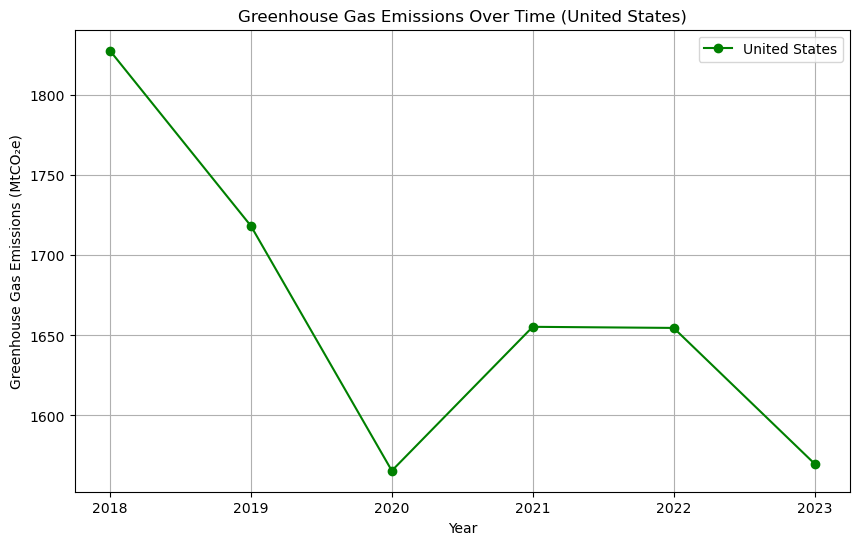

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(united_states_df_lineg["year"], united_states_df_lineg["greenhouse_gas_emissions"], marker='o', linestyle='-', color='g', label="United States")


plt.xlabel("Year")
plt.ylabel("Greenhouse Gas Emissions (MtCO₂e)")
plt.title("Greenhouse Gas Emissions Over Time (United States)")
plt.legend()
plt.grid(True)
plt.savefig("usagrnhs.png")
plt.show()

In [15]:
united_states_df_linef=united_states_df[united_states_df["country"] == "United States"][["year", "fossil_fuel_consumption"]]
united_states_df_linef

,year,fossil_fuel_consumption
20487,2018,22212.854
20488,2019,21948.141
20489,2020,19936.998
20490,2021,21170.129
20491,2022,21479.430
20492,2023,21102.203


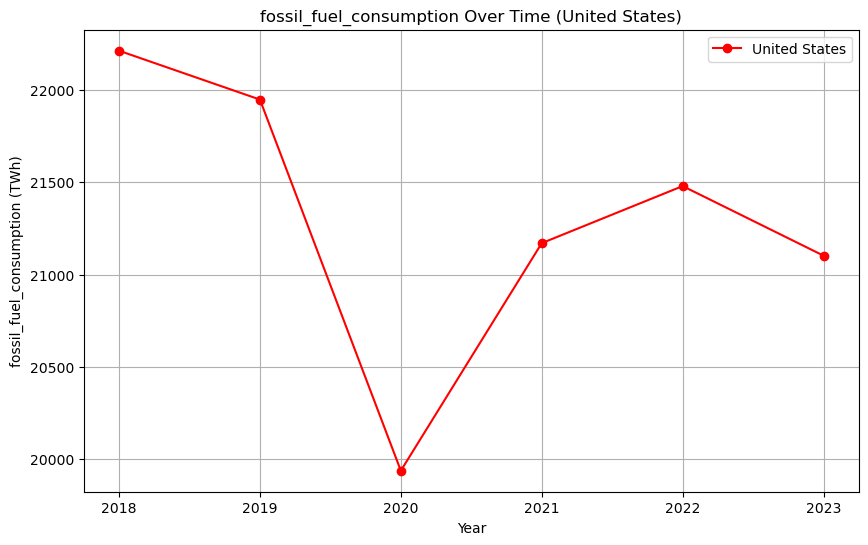

In [16]:
united_states_df_linef=united_states_df[united_states_df["country"] == "United States"][["year", "fossil_fuel_consumption"]]
plt.figure(figsize=(10, 6))
plt.plot(united_states_df_linef["year"], united_states_df_linef["fossil_fuel_consumption"], marker='o', linestyle='-', color='r', label="United States")


plt.xlabel("Year")
plt.ylabel("fossil_fuel_consumption (TWh)")
plt.title("fossil_fuel_consumption Over Time (United States)")
plt.legend()
plt.grid(True)

plt.savefig("usafossil.png")
plt.show()

In [17]:

united_states_df_line_el=united_states_df[united_states_df["country"] == "United States"][["year", "electricity_generation"]]
united_states_df_line_el

,year,electricity_generation
20487,2018,4201.55
20488,2019,4158.38
20489,2020,4043.18
20490,2021,4153.62
20491,2022,4286.91
20492,2023,4249.05


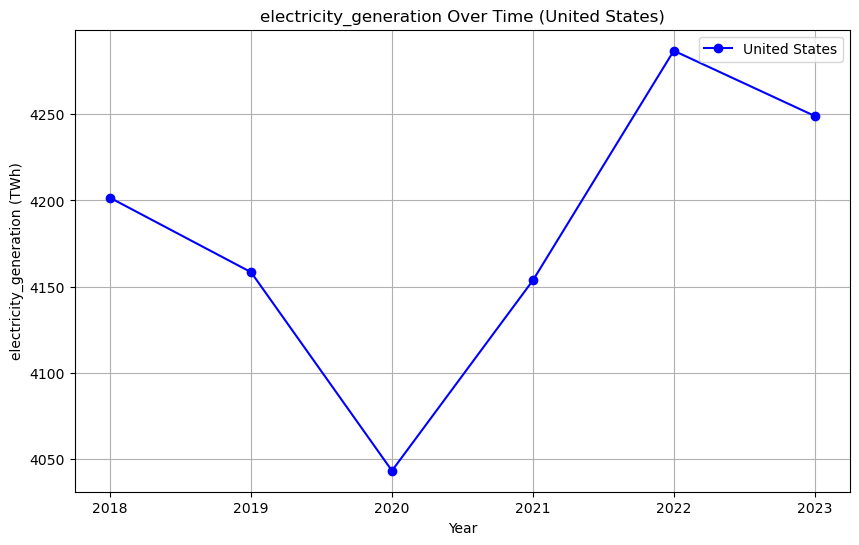

In [18]:

plt.figure(figsize=(10, 6))
plt.plot(united_states_df_line_el["year"], united_states_df_line_el["electricity_generation"], marker='o', linestyle='-', color='b', label="United States")

plt.xlabel("Year")
plt.ylabel("electricity_generation (TWh)")
plt.title("electricity_generation Over Time (United States)")
plt.legend()
plt.grid(True)

plt.savefig("usaelect.png")
plt.show()

In [19]:
china_line_grn=china_df[china_df["country"]=="China"][["year","greenhouse_gas_emissions"]]
china_line_grn

,year,greenhouse_gas_emissions
4500,2018,4563.94
4501,2019,4649.25
4502,2020,4716.12
4503,2021,5110.79
4504,2022,5183.77
4505,2023,5508.48


In [20]:
china_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
4500,China,2018,1.417069e+09,4563.94,29.818,33.669,7150.92,7166.14,32720.146
4501,China,2019,1.421864e+09,4649.25,7.079,36.053,7486.63,7503.43,33897.516
4502,China,2020,1.424930e+09,4716.12,-23.742,27.493,7762.03,7779.07,34728.391
4503,China,2021,1.425894e+09,5110.79,4.063,28.610,8520.02,8534.26,36292.246
4504,China,2022,1.425887e+09,5183.77,2.003,29.183,8834.42,8848.73,36372.648
4505,China,2023,1.425671e+09,5508.48,5.600,30.818,9445.28,9459.59,38677.414


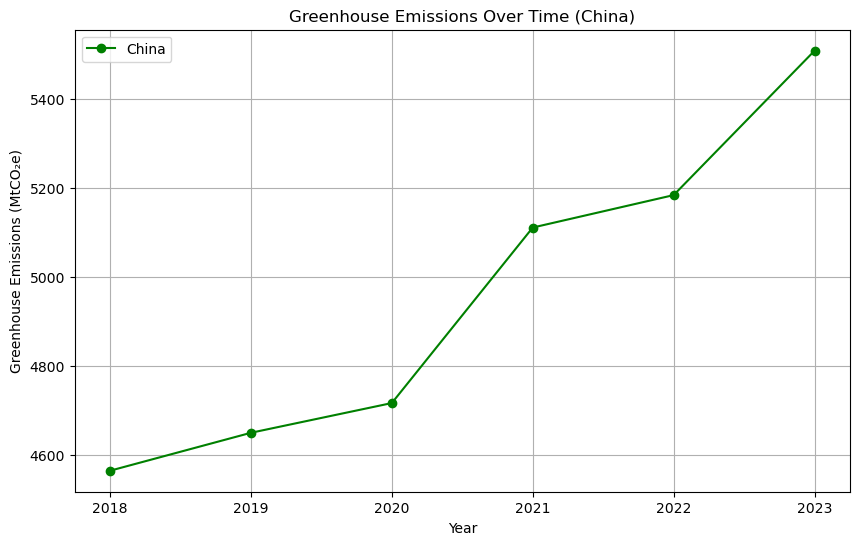

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(china_line_grn["year"], china_line_grn["greenhouse_gas_emissions"], marker='o', linestyle='-', color='g', label="China")

plt.xlabel("Year")
plt.ylabel("Greenhouse Emissions (MtCO₂e)")
plt.title("Greenhouse Emissions Over Time (China)")
plt.legend()
plt.grid(True)

plt.savefig("chinagrnhs.png")
plt.show()

In [22]:
china_line_ff=china_df[china_df["country"]=="China"][["year","fossil_fuel_consumption"]]
china_line_ff

,year,fossil_fuel_consumption
4500,2018,32720.146
4501,2019,33897.516
4502,2020,34728.391
4503,2021,36292.246
4504,2022,36372.648
4505,2023,38677.414


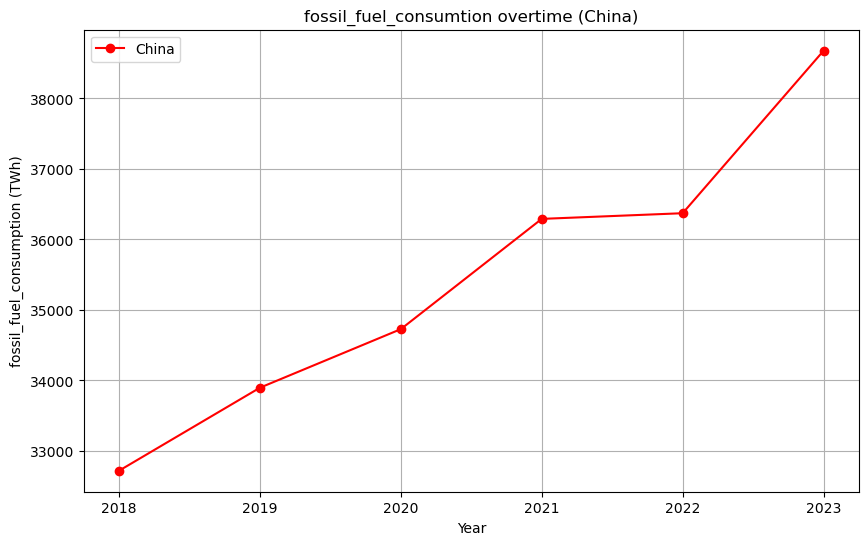

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(china_line_ff["year"], china_line_ff["fossil_fuel_consumption"], marker='o', linestyle='-', color='r', label=("China"))

plt.xlabel("Year")
plt.ylabel("fossil_fuel_consumption (TWh)")
plt.title("fossil_fuel_consumtion overtime (China)")
plt.legend()
plt.grid(True)

plt.savefig("chinafossil.png")
plt.show()

In [24]:
china_line_el=china_df[china_df["country"]=="China"][["year","electricity_generation"]]
china_line_el

,year,electricity_generation
4500,2018,7166.14
4501,2019,7503.43
4502,2020,7779.07
4503,2021,8534.26
4504,2022,8848.73
4505,2023,9459.59


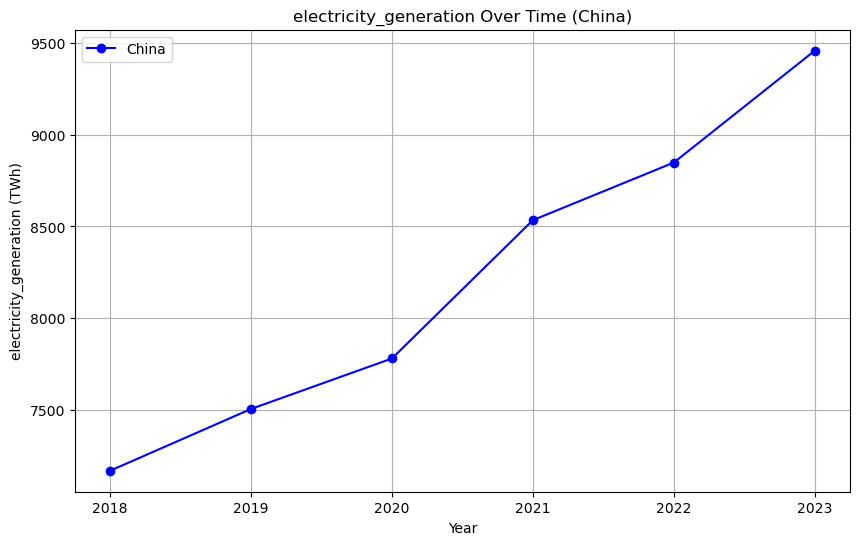

In [25]:

plt.figure(figsize=(10, 6))
plt.plot(china_line_el["year"], china_line_el["electricity_generation"], marker='o', linestyle='-', color='b', label=("China"))

plt.xlabel("Year")
plt.ylabel("electricity_generation (TWh)")
plt.title("electricity_generation Over Time (China)")
plt.legend()
plt.grid(True)

plt.savefig("chinaele.png")
plt.show()


In [26]:
brazil_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption
3055,Brazil,2018,210166592.0,82.36,15.988,238.946,636.37,601.39,1857.108
3056,Brazil,2019,211782880.0,89.89,10.687,264.483,658.29,633.33,1838.441
3057,Brazil,2020,213196304.0,83.85,-6.896,246.243,653.48,628.76,1706.122
3058,Brazil,2021,214326224.0,110.26,-1.120,243.486,679.21,656.11,1930.015
3059,Brazil,2022,215313504.0,71.45,-0.631,241.951,690.08,677.17,1873.238
3060,Brazil,2023,216422448.0,70.14,9.969,266.070,726.09,713.18,1877.917


In [27]:
brazil_line_gh=brazil_df[brazil_df["country"]=="Brazil"][["year","greenhouse_gas_emissions"]]
brazil_line_gh

,year,greenhouse_gas_emissions
3055,2018,82.36
3056,2019,89.89
3057,2020,83.85
3058,2021,110.26
3059,2022,71.45
3060,2023,70.14


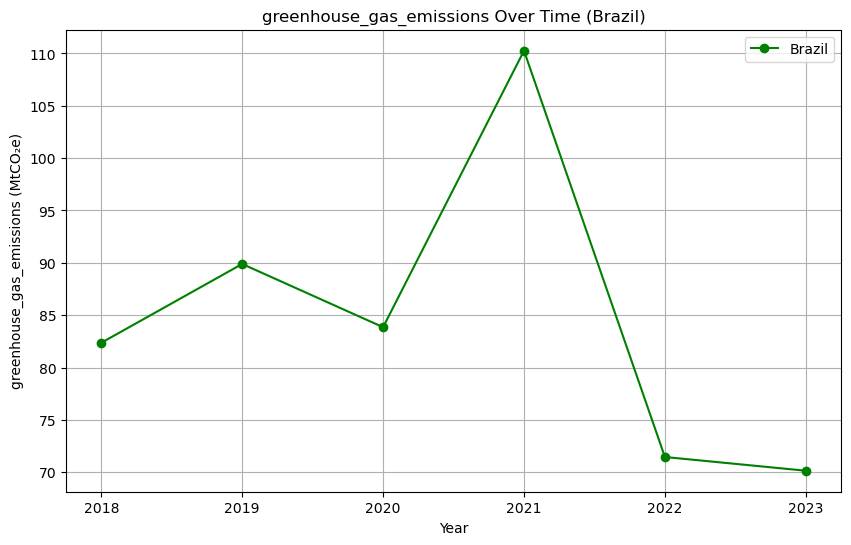

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(brazil_line_gh["year"], brazil_line_gh["greenhouse_gas_emissions"], marker='o', linestyle='-', color='g', label=("Brazil"))

plt.xlabel("Year")
plt.ylabel("greenhouse_gas_emissions (MtCO₂e)")
plt.title("greenhouse_gas_emissions Over Time (Brazil)")
plt.legend()
plt.grid(True)

plt.savefig("brazilgrn.png")
plt.show()

In [29]:
brazil_line_ff=brazil_df[brazil_df["country"]=="Brazil"][["year","fossil_fuel_consumption"]]
brazil_line_ff

,year,fossil_fuel_consumption
3055,2018,1857.108
3056,2019,1838.441
3057,2020,1706.122
3058,2021,1930.015
3059,2022,1873.238
3060,2023,1877.917


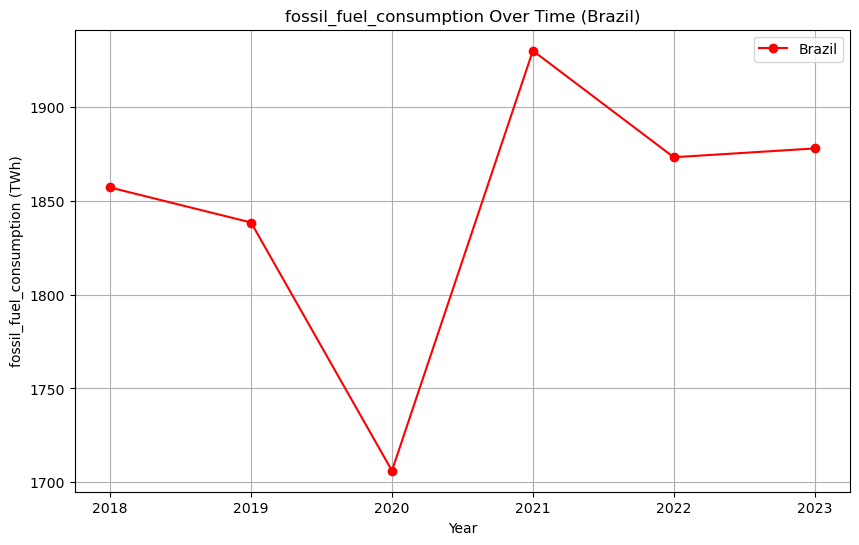

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(brazil_line_ff["year"], brazil_line_ff["fossil_fuel_consumption"], marker='o', linestyle='-', color='r', label=("Brazil"))

plt.xlabel("Year")
plt.ylabel("fossil_fuel_consumption (TWh)")
plt.title("fossil_fuel_consumption Over Time (Brazil)")
plt.legend()
plt.grid(True)

plt.savefig("brazilfoss.png")
plt.show()

In [31]:
brazil_line_el=brazil_df[brazil_df["country"]=="Brazil"][["year","electricity_generation"]]
brazil_line_el

,year,electricity_generation
3055,2018,601.39
3056,2019,633.33
3057,2020,628.76
3058,2021,656.11
3059,2022,677.17
3060,2023,713.18


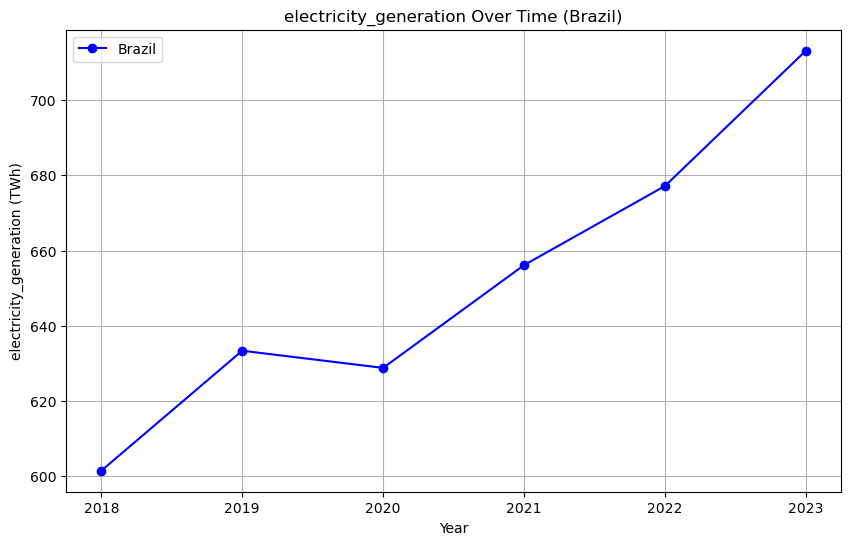

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(brazil_line_el["year"], brazil_line_el["electricity_generation"], marker='o', linestyle='-', color='b', label=("Brazil"))

plt.xlabel("Year")
plt.ylabel("electricity_generation (TWh)")
plt.title("electricity_generation Over Time (Brazil)")
plt.legend()
plt.grid(True)

plt.savefig("brazilel.png")
plt.show()

In [43]:

data_raw_owid = pd.read_csv("owid-energy-data.csv")

energy_data_18_23=data_raw_owid.loc[(data_raw_owid["year"] >= 2018) & (data_raw_owid["year"] <= 2023)]
energy_data_18_23.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
18,ASEAN (Ember),2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.647,NaN,NaN,NaN,NaN,NaN,3.47,NaN,0.327,NaN
19,ASEAN (Ember),2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.224,NaN,NaN,NaN,NaN,NaN,5.91,NaN,0.531,NaN
20,ASEAN (Ember),2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.826,NaN,NaN,NaN,NaN,NaN,5.79,NaN,0.526,NaN
21,ASEAN (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.130,NaN,NaN,NaN,NaN,NaN,7.63,NaN,0.666,NaN
22,ASEAN (Ember),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.086,NaN,NaN,NaN,NaN,NaN,13.09,NaN,1.086,NaN


In [44]:
countries_of_interest = ["Canada", "United States"]

energy_data_can_usa_18_23 = energy_data_18_23.loc[energy_data_18_23["country"].isin(countries_of_interest)]

energy_data_can_usa_18_23

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
3861,Canada,2018,CAN,37035260.0,1.677189e+12,3.286,0.777,659.715,24.433,284.594,...,0.574,0.246,6.212,4.689,88.556,903.733,33.47,2391.129,5.060,2.165
3862,Canada,2019,CAN,37522584.0,1.708858e+12,1.317,0.322,659.724,24.755,274.768,...,0.622,0.264,-1.780,-1.897,86.659,876.272,32.88,2309.519,5.012,2.130
3863,Canada,2020,CAN,37888704.0,1.622144e+12,-7.288,-1.804,605.735,22.951,252.054,...,0.655,0.294,8.787,7.269,93.928,943.817,35.76,2479.047,5.473,2.458
3864,Canada,2021,CAN,38155012.0,1.703443e+12,6.769,1.554,642.225,24.504,258.420,...,0.799,0.409,4.284,3.666,97.594,911.021,34.76,2557.818,5.374,2.524
3865,Canada,2022,CAN,38454328.0,1.761296e+12,19.920,4.881,764.161,29.385,221.562,...,0.911,0.463,2.895,2.459,100.052,975.963,37.53,2601.851,5.689,2.519
3866,Canada,2023,CAN,38781288.0,NaN,14.727,4.328,869.309,33.713,230.008,...,1.178,0.512,1.459,1.091,101.143,982.432,38.10,2608.044,6.001,2.610
20487,United States,2018,USA,332140032.0,1.812469e+13,-1.325,-5.433,1218.223,404.621,186.156,...,2.222,0.932,7.222,45.081,728.691,820.949,272.67,2193.926,6.490,2.722
20488,United States,2019,USA,334319680.0,1.854055e+13,2.780,11.250,1243.930,415.870,172.021,...,2.570,1.071,8.514,59.126,787.816,885.021,295.88,2356.476,7.115,2.964
20489,United States,2020,USA,335942016.0,1.802736e+13,-9.029,-37.549,1126.150,378.321,162.826,...,3.233,1.408,14.214,108.672,896.488,1005.947,337.94,2668.579,8.358,3.641
20490,United States,2021,USA,336997632.0,1.909938e+13,9.917,37.518,1233.954,415.839,160.980,...,3.958,1.674,11.913,103.127,999.615,1122.263,378.20,2966.237,9.105,3.851


In [45]:
wind_consumption_by_country = energy_data_can_usa_18_23.loc[energy_data_can_usa_18_23["country"].isin(countries_of_interest), ["country", "year", "wind_consumption", "coal_consumption"]]
wind_consumption_by_country

,country,year,wind_consumption,coal_consumption
3861,Canada,2018,88.556,180.959
3862,Canada,2019,86.659,169.154
3863,Canada,2020,93.928,146.178
3864,Canada,2021,97.594,131.237
3865,Canada,2022,100.052,106.977
3866,Canada,2023,101.143,102.974
20487,United States,2018,728.691,3689.458
20488,United States,2019,787.816,3150.460
20489,United States,2020,896.488,2556.181
20490,United States,2021,999.615,2936.894


In [46]:
can_df = wind_consumption_by_country.loc[wind_consumption_by_country["country"] == "Canada",]
can_df

,country,year,wind_consumption,coal_consumption
3861,Canada,2018,88.556,180.959
3862,Canada,2019,86.659,169.154
3863,Canada,2020,93.928,146.178
3864,Canada,2021,97.594,131.237
3865,Canada,2022,100.052,106.977
3866,Canada,2023,101.143,102.974


In [48]:
usa_df = wind_consumption_by_country.loc[wind_consumption_by_country["country"] == "United States"]
usa_df

,country,year,wind_consumption,coal_consumption
20487,United States,2018,728.691,3689.458
20488,United States,2019,787.816,3150.460
20489,United States,2020,896.488,2556.181
20490,United States,2021,999.615,2936.894
20491,United States,2022,1143.709,2752.975
20492,United States,2023,1115.776,2276.868


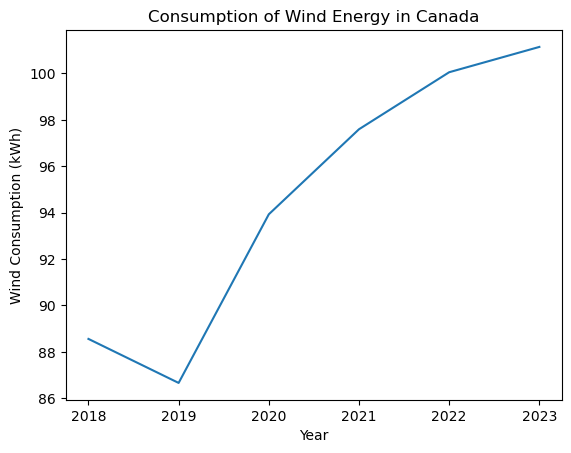

In [49]:
can_plot = plt.plot(can_df["year"], can_df["wind_consumption"])
plt.title("Consumption of Wind Energy in Canada")
plt.xlabel("Year")
plt.ylabel("Wind Consumption (kWh)")
can_plot

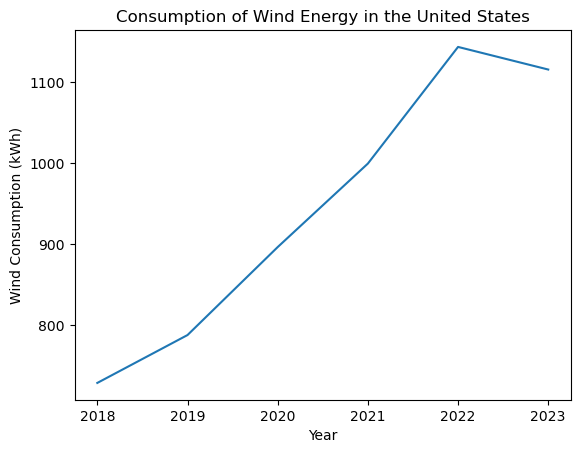

In [50]:
usa_plot = plt.plot(usa_df["year"], usa_df["wind_consumption"])
plt.title("Consumption of Wind Energy in the United States")
plt.xlabel("Year")
plt.ylabel("Wind Consumption (kWh)")
usa_plot

In [51]:
large_countries = ["United States", "Indonesia", "Nigeria", "Japan", "Russia"]

small_countries=["Serbia", "Greece", "Croatia", "Hungary", "Slovenia"]

In [52]:
#Filter and select data from the existing data frame (check values(filter) and create a list of data/columns that wil remain in the newly created DataFrame )

large_countries_df = energy_data_raw_df.loc[energy_data_raw_df["country"].isin(large_countries),
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation","fossil_fuel_consumption", "coal_consumption"]]

# Print new DataFrame
large_countries_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption,coal_consumption
9447,Indonesia,2018,267066848.0,194.13,45.801,34.289,285.29,283.790,1984.084,655.729
9448,Indonesia,2019,269582880.0,204.98,70.560,58.482,297.12,295.440,2109.228,801.231
9449,Indonesia,2020,271857984.0,199.91,31.332,76.806,293.37,291.820,1942.665,765.380
9450,Indonesia,2021,273753184.0,211.67,10.643,84.981,310.33,309.360,1975.075,763.230
9451,Indonesia,2022,275501344.0,225.45,12.427,95.542,334.51,333.540,2515.085,1216.511
9452,Indonesia,2023,277534112.0,NaN,17.620,112.376,NaN,350.609,2514.420,1199.906
10234,Japan,2018,126255872.0,564.50,7.653,5.137,1053.18,1053.180,4710.478,1386.597
10235,Japan,2019,125791680.0,537.49,-6.931,4.781,1025.78,1025.780,4556.221,1362.594
10236,Japan,2020,125244760.0,524.12,7.684,5.148,996.96,996.960,4189.554,1270.752
10237,Japan,2021,124612528.0,518.55,-2.865,5.000,1019.71,1019.710,4316.124,1369.467


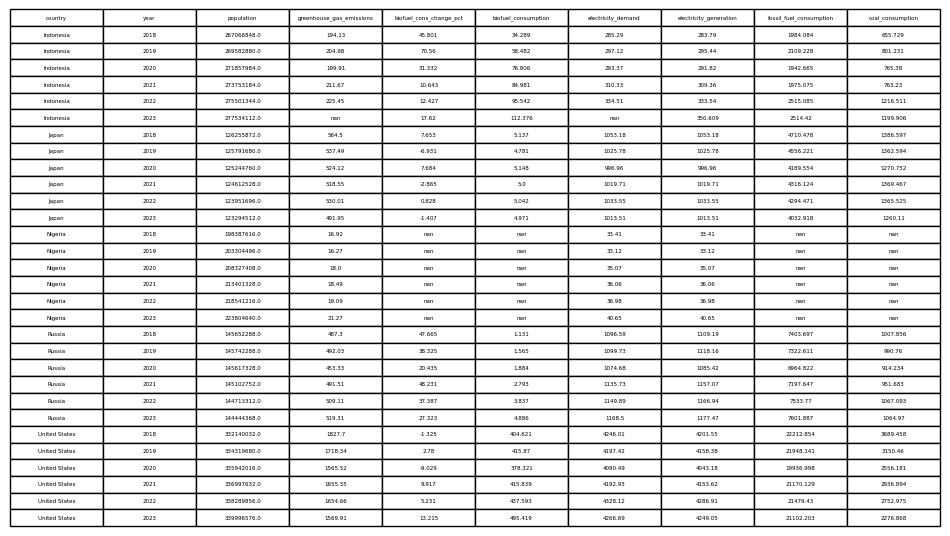

In [53]:
##Create a table and save as PNG

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.axis('tight')
ax.axis('off')

# Convert DataFrame to a table
table = ax.table(cellText=large_countries_df.values, 
                 colLabels=large_countries_df.columns, 
                 cellLoc='center', 
                 loc='center')

# Save plot as PNG
plt.savefig("large_countries_data_table.png", dpi=300, bbox_inches="tight")

#Display the table
plt.show()

In [54]:
#Filter and select data from the existing data frame (check values(filter) and create a list of data/columns that wil remain in the newly created DataFrame )

small_countries_df = energy_data_raw_df.loc[
    energy_data_raw_df["country"].isin(small_countries),
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation","fossil_fuel_consumption", "coal_consumption"]]

# Print new DataFrame
small_countries_df

,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption,coal_consumption
5035,Croatia,2018,4160488.0,2.72,4862.697,0.315,18.91,13.52,71.602,4.248
5036,Croatia,2019,4129749.0,3.07,131.074,0.728,18.78,12.65,72.605,4.900
5037,Croatia,2020,4096872.0,3.00,4.836,0.763,17.87,13.23,67.616,4.201
5038,Croatia,2021,4060139.0,3.18,39.413,1.063,19.07,15.11,69.077,4.830
5039,Croatia,2022,4030361.0,3.45,-76.778,0.247,18.93,14.24,68.931,4.727
5040,Croatia,2023,4008615.0,3.47,0.814,0.249,18.86,16.93,69.229,3.907
8243,Greece,2018,10633275.0,28.68,0.756,1.956,58.89,52.61,279.214,54.775
8244,Greece,2019,10574026.0,23.83,15.404,2.257,57.89,47.95,271.977,37.175
8245,Greece,2020,10512232.0,20.10,5.876,2.389,56.37,47.51,228.208,21.295
8246,Greece,2021,10445368.0,20.78,8.261,2.587,57.92,54.24,241.738,19.908


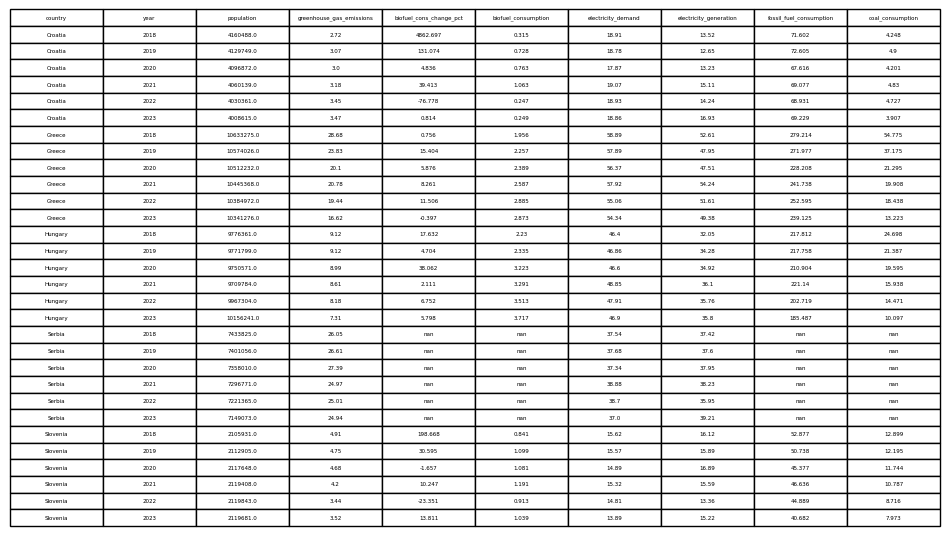

In [55]:
##Create a table and save as PNG

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.axis('tight')
ax.axis('off')

# Convert DataFrame to a table
table = ax.table(cellText=small_countries_df.values, 
                 colLabels=small_countries_df.columns, 
                 cellLoc='center', 
                 loc='center')

# Save plot as PNG
plt.savefig("small_countries_data_table.png", dpi=300, bbox_inches="tight")

#Display the table
plt.show()

        country  year  greenhouse_gas_emissions
5040    Croatia  2023                      3.47
8248     Greece  2023                     16.62
9145    Hungary  2023                      7.31
17260    Serbia  2023                     24.94
17512  Slovenia  2023                      3.52


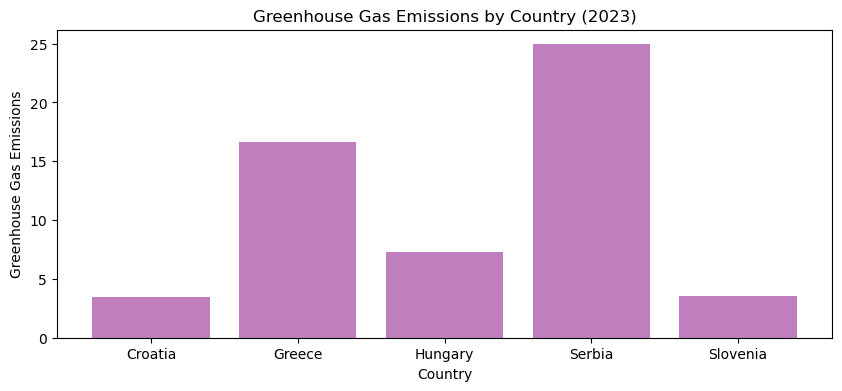

In [56]:
# Defines a list of countries you want to focus on for the analysis by creating a list of small countries
selected_countries_small = ["Slovenia", "Serbia", "Hungary", "Greece", "Croatia"]

# Find the most recent(max) year and retrieve it from small_countries_df DataFrame
latest_year = small_countries_df["year"].max()

# Filter the small_countries_df DataFrame to only include rows where the year is equal to latest_year( is nost recent year).
df_recent = small_countries_df[small_countries_df["year"] == latest_year]

# ilter the DataFrame further to only include rows where the country is in the selected_countries_small list.
df_recent = df_recent[df_recent["country"].isin(selected_countries_small)]

# Select the columns from the filtered DataFrame to create a new DataFrame ( in this case we are only looking for country, year, and greenhouse_gas_emissions columns)
df_final = df_recent[["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows
print(df_final.head())

#Create a figure for the plot with a width of 10 and height of 4 inches.
plt.figure(figsize=(10, 4))

#Plot a bar chart with the countries on the x-axis and their corresponding greenhouse gas emissions on the y-axis. The bars are colored purple with an alpha (transparency) of 0.5.
plt.bar(df_final["country"], df_final["greenhouse_gas_emissions"], color='purple', alpha=0.5)

#Set the x-axis label to "Country".
plt.xlabel("Country")

#Set the y-axis label to "Greenhouse Gas Emissions".
plt.ylabel("Greenhouse Gas Emissions")

##Sets the title of the plot to "Greenhouse Gas Emissions by Country (2023)".
plt.title("Greenhouse Gas Emissions by Country (2023)")

#Display the plot
plt.show()

             country  year  greenhouse_gas_emissions
9452       Indonesia  2023                       NaN
10239          Japan  2023                    491.95
13784        Nigeria  2023                     21.27
16716         Russia  2023                    519.31
20492  United States  2023                   1569.91


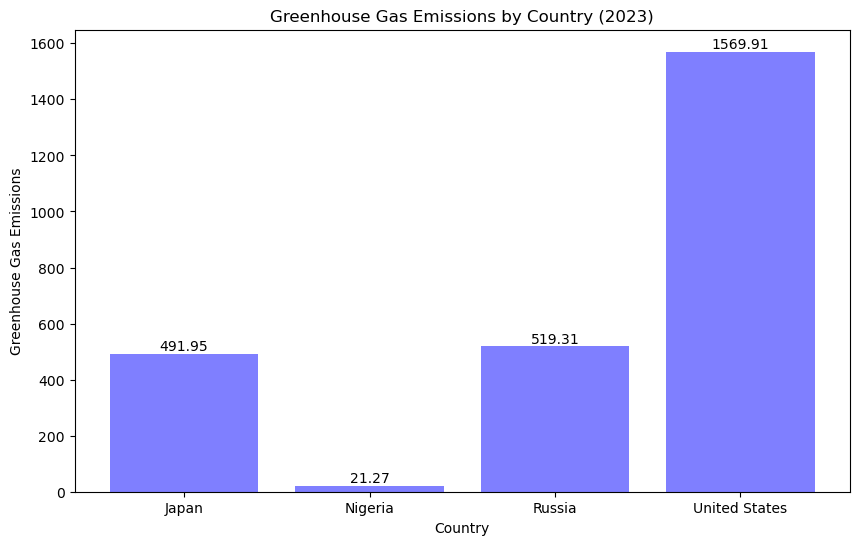

In [57]:
# Defines a list of countries you want to focus on for the analysis by creating a list of large countries
selected_countries_large = ["Indonesia", "Japan", "Nigeria", "Russia", "United States"]

# Find the most recent(max) year and retrieve it from large_countries_df DataFrame
latest_year = large_countries_df["year"].max()

# Filter the large_countries_df DataFrame to only include rows where the year is equal to latest_year( is nost recent year).
df_recent = large_countries_df[large_countries_df["year"] == latest_year]

# Check if Indonesia is present in the filtered data
if "Indonesia" not in df_recent["country"].values:
    print("Warning: Indonesia is missing from the data for the year", latest_year)

# ilter the DataFrame further to only include rows where the country is in the selected_countries_large list.
df_recent = df_recent[df_recent["country"].isin(selected_countries_large)]

# Select relevant columns
df_final = df_recent[["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows
print(df_final.head())

#Create a figure for the plot with a width of 10 and height of 4 inches.
plt.figure(figsize=(10, 6))

#Plot a bar chart with the countries on the x-axis and their corresponding greenhouse gas emissions on the y-axis. The bars are colored blue with an alpha (transparency) of 0.5.
bars = plt.bar(df_final["country"], df_final["greenhouse_gas_emissions"], color='blue', alpha=0.5)

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)


#Set the x-axis label to "Country".
plt.xlabel("Country")

#Set the x-axis label to "Greenhouse Gas Emissions"".
plt.ylabel("Greenhouse Gas Emissions")

#Sets the title of the plot to "Greenhouse Gas Emissions by Country (2023)"
plt.title(f"Greenhouse Gas Emissions by Country ({latest_year})")

#Display the plot
plt.show()

Large Countries Data:
              country  year  greenhouse_gas_emissions
9452       Indonesia  2023                       NaN
10239          Japan  2023                    491.95
13784        Nigeria  2023                     21.27
16716         Russia  2023                    519.31
20492  United States  2023                   1569.91
Small Countries Data:
         country  year  greenhouse_gas_emissions
5040    Croatia  2023                      3.47
8248     Greece  2023                     16.62
9145    Hungary  2023                      7.31
17260    Serbia  2023                     24.94
17512  Slovenia  2023                      3.52


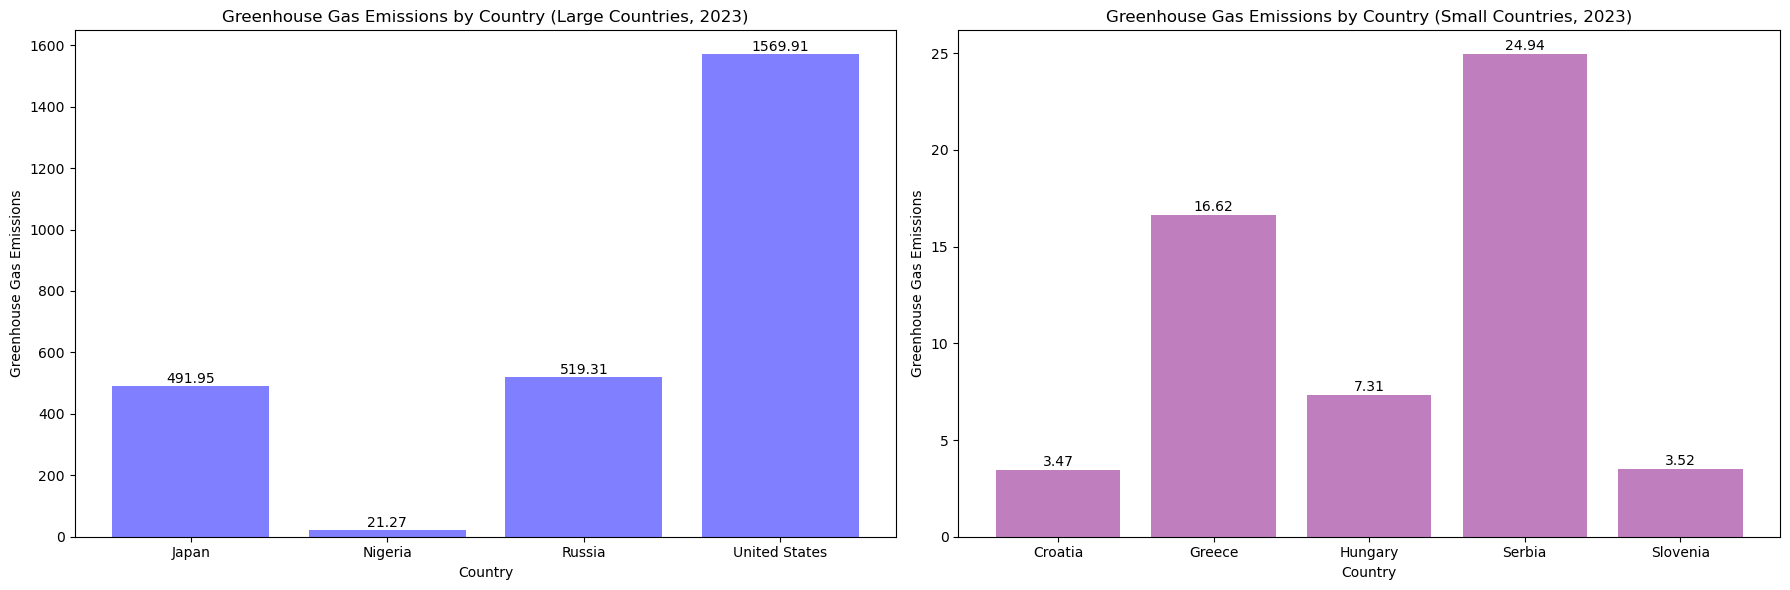

In [58]:
# Analyze large countries data
latest_year_large = large_countries_df["year"].max()

# Filter for the most recent year
df_recent_large = large_countries_df[large_countries_df["year"] == latest_year_large]

# Filter for selected countries
df_recent_large = df_recent_large[df_recent_large["country"].isin(selected_countries_large)]

# Select relevant columns
df_final_large = df_recent_large[["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows
print("Large Countries Data:\n", df_final_large.head())

# Analyze small countries data
latest_year_small = small_countries_df["year"].max()

# Filter for the most recent year
df_recent_small = small_countries_df[small_countries_df["year"] == latest_year_small]

# Filter for selected countries
df_recent_small = df_recent_small[df_recent_small["country"].isin(selected_countries_small)]

# Select relevant columns
df_final_small = df_recent_small[["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows
print("Small Countries Data:\n", df_final_small.head())

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  

# Plot large countries bar chart on the first subplot
bars_large = axes[0].bar(df_final_large["country"], df_final_large["greenhouse_gas_emissions"], color='blue', alpha=0.5)
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Greenhouse Gas Emissions")
axes[0].set_title(f"Greenhouse Gas Emissions by Country (Large Countries, {latest_year_large})")

# Adding value labels on top of the bars for large countries
for bar in bars_large:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Plot small countries bar chart on the second subplot
bars_small = axes[1].bar(df_final_small["country"], df_final_small["greenhouse_gas_emissions"], color='purple', alpha=0.5)
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Greenhouse Gas Emissions")
axes[1].set_title(f"Greenhouse Gas Emissions by Country (Small Countries, {latest_year_small})")

# Adding value labels on top of the bars for small countries
for bar in bars_small:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Display the plots
plt.tight_layout()  # Adjusts layout for better spacing
plt.savefig("bar_plt_large_and_small_countries_side_by_side.png")
plt.show()

In [59]:
# Filter greenhouse gas emissions data for selected small countries
#The result is assigned to the "country"_line variable.
slovenia_line = small_countries_df[small_countries_df["country"] == "Slovenia"][["country", "year", "greenhouse_gas_emissions"]]
serbia_line = small_countries_df[small_countries_df["country"] == "Serbia"][["country", "year", "greenhouse_gas_emissions"]]
greece_line = small_countries_df[small_countries_df["country"] == "Greece"][["country", "year", "greenhouse_gas_emissions"]]
hungary_line = small_countries_df[small_countries_df["country"] == "Hungary"][["country", "year", "greenhouse_gas_emissions"]]
croatia_line = small_countries_df[small_countries_df["country"] == "Croatia"][["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows to verify data for each country
print("Slovenia Data:\n", slovenia_line.head(), "\n")
print("Serbia Data:\n", serbia_line.head(), "\n")
print("Greece Data:\n", greece_line.head(), "\n")
print("Hungary Data:\n", hungary_line.head(), "\n")
print("Croatia Data:\n", croatia_line.head(), "\n")

Slovenia Data:
         country  year  greenhouse_gas_emissions
17507  Slovenia  2018                      4.91
17508  Slovenia  2019                      4.75
17509  Slovenia  2020                      4.68
17510  Slovenia  2021                      4.20
17511  Slovenia  2022                      3.44 

Serbia Data:
       country  year  greenhouse_gas_emissions
17255  Serbia  2018                     26.05
17256  Serbia  2019                     26.61
17257  Serbia  2020                     27.39
17258  Serbia  2021                     24.97
17259  Serbia  2022                     25.01 

Greece Data:
      country  year  greenhouse_gas_emissions
8243  Greece  2018                     28.68
8244  Greece  2019                     23.83
8245  Greece  2020                     20.10
8246  Greece  2021                     20.78
8247  Greece  2022                     19.44 

Hungary Data:
       country  year  greenhouse_gas_emissions
9140  Hungary  2018                      9.12
9141  Hun

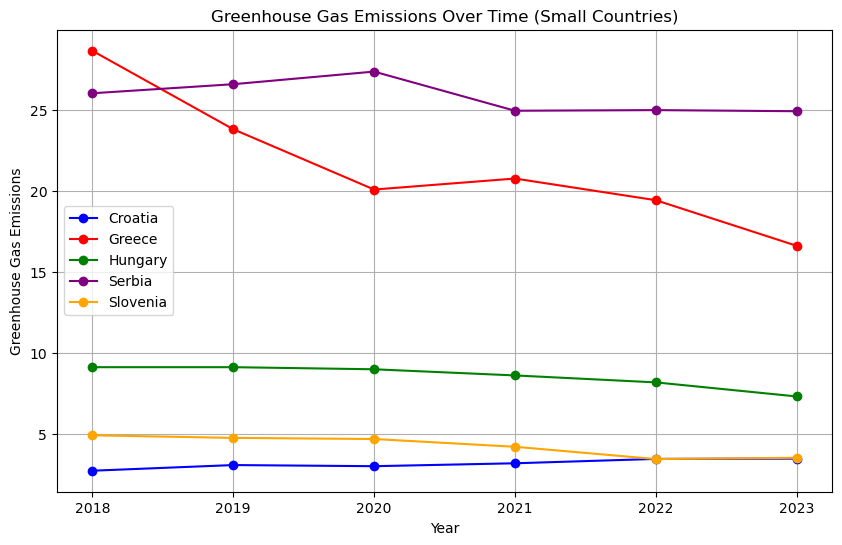

In [60]:
# Plot greenhouse gas emissions for selected small countries

# Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(croatia_line["year"], croatia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='blue', label="Croatia")
plt.plot(greece_line["year"], greece_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='red', label="Greece")
plt.plot(hungary_line["year"], hungary_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='green', label="Hungary")
plt.plot(serbia_line["year"], serbia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='purple', label="Serbia")
plt.plot(slovenia_line["year"], slovenia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='orange', label="Slovenia")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Greenhouse Gas Emissions")
plt.title("Greenhouse Gas Emissions Over Time (Small Countries)")

# Legend and grid
plt.legend()
plt.grid(True)

# Save figure as PNG
plt.savefig("line_plot_small_countries_data.png")

# Show plot
plt.show()

In [61]:
# Filter greenhouse gas emissions data for selected large countries
#The result is assigned to the "country"_line variable.
indonesia_line = large_countries_df[large_countries_df["country"] == "Indonesia"][["country", "year", "greenhouse_gas_emissions"]]
japan_line = large_countries_df[large_countries_df["country"] == "Japan"][["country", "year", "greenhouse_gas_emissions"]]
nigeria_line = large_countries_df[large_countries_df["country"] == "Nigeria"][["country", "year", "greenhouse_gas_emissions"]]
russia_line = large_countries_df[large_countries_df["country"] == "Russia"][["country", "year", "greenhouse_gas_emissions"]]
united_states_line = large_countries_df[large_countries_df["country"] == "United States"][["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows to verify data for each country
print("Indonesia Data:\n", indonesia_line.head(), "\n")
print("Japan Data:\n", japan_line.head(), "\n")
print("Nigeria Data:\n", nigeria_line.head(), "\n")
print("Russia Data:\n", russia_line.head(), "\n")
print("United States Data:\n", united_states_line.head(), "\n")

Indonesia Data:
         country  year  greenhouse_gas_emissions
9447  Indonesia  2018                    194.13
9448  Indonesia  2019                    204.98
9449  Indonesia  2020                    199.91
9450  Indonesia  2021                    211.67
9451  Indonesia  2022                    225.45 

Japan Data:
       country  year  greenhouse_gas_emissions
10234   Japan  2018                    564.50
10235   Japan  2019                    537.49
10236   Japan  2020                    524.12
10237   Japan  2021                    518.55
10238   Japan  2022                    530.01 

Nigeria Data:
        country  year  greenhouse_gas_emissions
13779  Nigeria  2018                     16.92
13780  Nigeria  2019                     16.27
13781  Nigeria  2020                     18.00
13782  Nigeria  2021                     18.49
13783  Nigeria  2022                     19.09 

Russia Data:
       country  year  greenhouse_gas_emissions
16711  Russia  2018                    487.

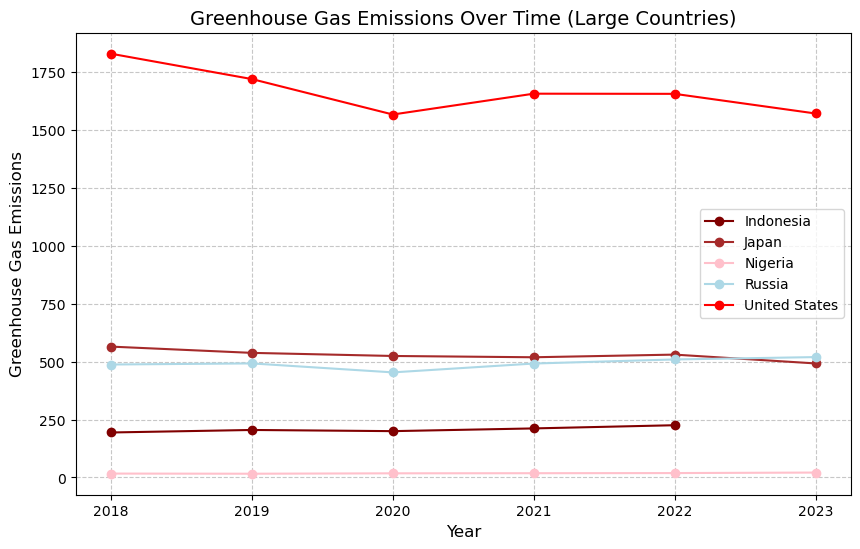

In [62]:
# Plot greenhouse gas emissions for selected large countries

#Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(indonesia_line["year"], indonesia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='maroon', label="Indonesia")
plt.plot(japan_line["year"], japan_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='brown', label="Japan")
plt.plot(nigeria_line["year"], nigeria_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='pink', label="Nigeria")
plt.plot(russia_line["year"], russia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='lightblue', label="Russia")  
plt.plot(united_states_line["year"], united_states_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='red', label="United States")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Greenhouse Gas Emissions", fontsize=12)
plt.title("Greenhouse Gas Emissions Over Time (Large Countries)", fontsize=14)  

# Legend and grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7) 

# Save figure as PNG
plt.savefig("line_plot_large_countries_data.png")

# Sow plot
plt.show()

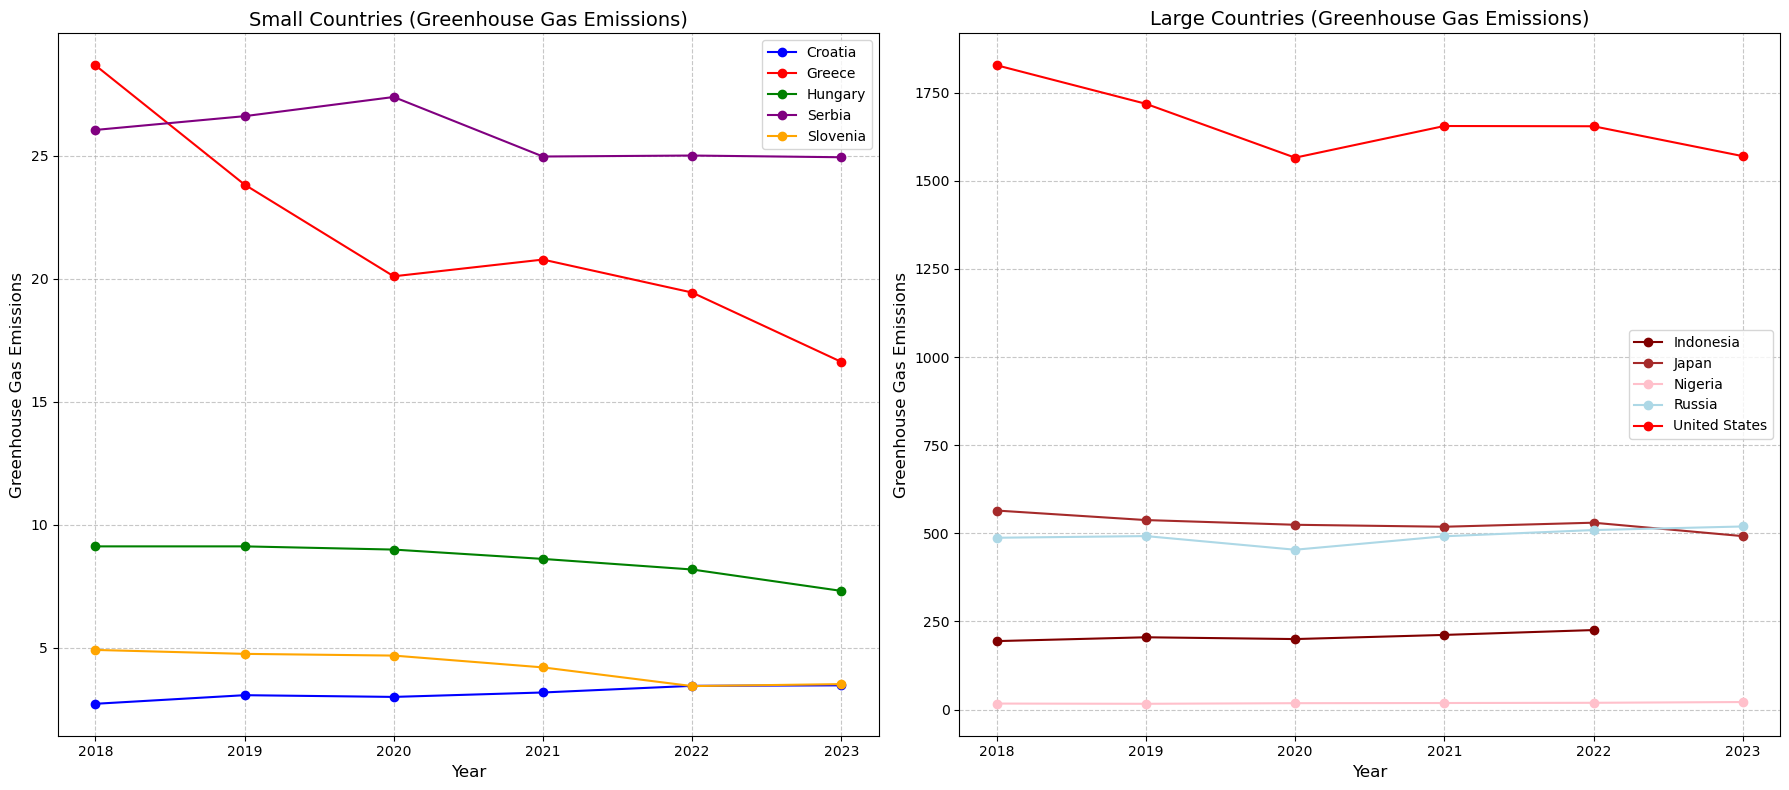

In [63]:
# Set up the figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  

# Plot data for small countries on the first subplot (axes[0])
axes[0].plot(croatia_line["year"], croatia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='blue', label="Croatia")
axes[0].plot(greece_line["year"], greece_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='red', label="Greece")
axes[0].plot(hungary_line["year"], hungary_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='green', label="Hungary")
axes[0].plot(serbia_line["year"], serbia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='purple', label="Serbia")
axes[0].plot(slovenia_line["year"], slovenia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='orange', label="Slovenia")
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Greenhouse Gas Emissions", fontsize=12)
axes[0].set_title("Small Countries (Greenhouse Gas Emissions)", fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.7)  

# Plot data for large countries on the second subplot (axes[1])
axes[1].plot(indonesia_line["year"], indonesia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='maroon', label="Indonesia")
axes[1].plot(japan_line["year"], japan_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='brown', label="Japan")
axes[1].plot(nigeria_line["year"], nigeria_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='pink', label="Nigeria")
axes[1].plot(russia_line["year"], russia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='lightblue', label="Russia")
axes[1].plot(united_states_line["year"], united_states_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='red', label="United States")
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Greenhouse Gas Emissions", fontsize=12)
axes[1].set_title("Large Countries (Greenhouse Gas Emissions)", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("line_plot_large_and_small_countries_side_by_side.png")
plt.show()

In [64]:
# Filter greenhouse gas emissions data for selected small countries
#The result is assigned to the "country"_line variable.
slovenia_line = small_countries_df[small_countries_df["country"] == "Slovenia"][["country", "year", "fossil_fuel_consumption"]]
serbia_line = small_countries_df[small_countries_df["country"] == "Serbia"][["country", "year", "fossil_fuel_consumption"]]
greece_line = small_countries_df[small_countries_df["country"] == "Greece"][["country", "year", "fossil_fuel_consumption"]]
hungary_line = small_countries_df[small_countries_df["country"] == "Hungary"][["country", "year", "fossil_fuel_consumption"]]
croatia_line = small_countries_df[small_countries_df["country"] == "Croatia"][["country", "year", "fossil_fuel_consumption"]]

# Display first few rows to verify data for each country
print("Slovenia Data:\n", slovenia_line.head(), "\n")
print("Serbia Data:\n", serbia_line.head(), "\n")
print("Greece Data:\n", greece_line.head(), "\n")
print("Hungary Data:\n", hungary_line.head(), "\n")
print("Croatia Data:\n", croatia_line.head(), "\n")

Slovenia Data:
         country  year  fossil_fuel_consumption
17507  Slovenia  2018                   52.877
17508  Slovenia  2019                   50.738
17509  Slovenia  2020                   45.377
17510  Slovenia  2021                   46.636
17511  Slovenia  2022                   44.889 

Serbia Data:
       country  year  fossil_fuel_consumption
17255  Serbia  2018                      NaN
17256  Serbia  2019                      NaN
17257  Serbia  2020                      NaN
17258  Serbia  2021                      NaN
17259  Serbia  2022                      NaN 

Greece Data:
      country  year  fossil_fuel_consumption
8243  Greece  2018                  279.214
8244  Greece  2019                  271.977
8245  Greece  2020                  228.208
8246  Greece  2021                  241.738
8247  Greece  2022                  252.595 

Hungary Data:
       country  year  fossil_fuel_consumption
9140  Hungary  2018                  217.812
9141  Hungary  2019          

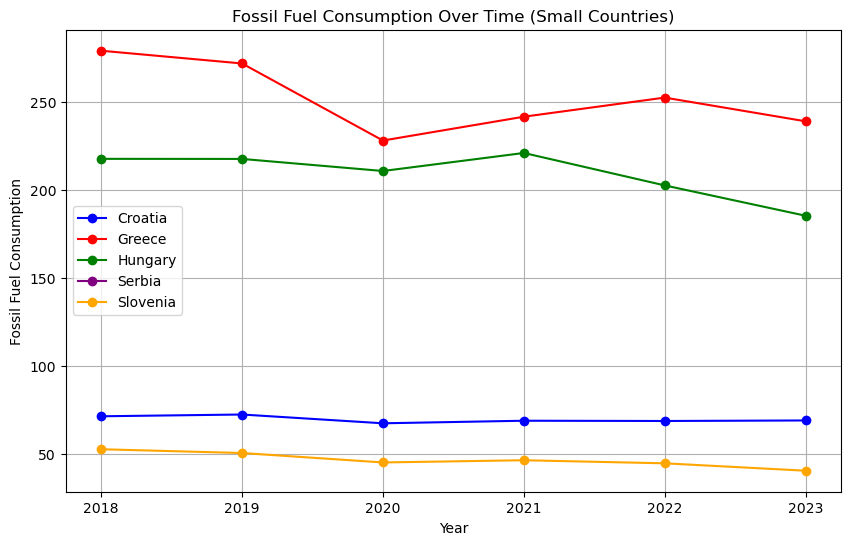

In [66]:
# Plot greenhouse gas emissions for selected small countries

# Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(croatia_line["year"], croatia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='blue', label="Croatia")
plt.plot(greece_line["year"], greece_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='red', label="Greece")
plt.plot(hungary_line["year"], hungary_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='green', label="Hungary")
plt.plot(serbia_line["year"], serbia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='purple', label="Serbia")
plt.plot(slovenia_line["year"], slovenia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='orange', label="Slovenia")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Fossil Fuel Consumption")
plt.title("Fossil Fuel Consumption Over Time (Small Countries)")

# Legend and grid
plt.legend()
plt.grid(True)

# Save figure as PNG
plt.savefig("line_plot_fossil_fuel_consumption_small_countries_data.png")

# Show plot
plt.show()

In [67]:
# Filter greenhouse gas emissions data for selected large countries
#The result is assigned to the "country"_line variable.
indonesia_line = large_countries_df[large_countries_df["country"] == "Indonesia"][["country", "year", "fossil_fuel_consumption"]]
japan_line = large_countries_df[large_countries_df["country"] == "Japan"][["country", "year", "fossil_fuel_consumption"]]
nigeria_line = large_countries_df[large_countries_df["country"] == "Nigeria"][["country", "year", "fossil_fuel_consumption"]]
russia_line = large_countries_df[large_countries_df["country"] == "Russia"][["country", "year", "fossil_fuel_consumption"]]
united_states_line = large_countries_df[large_countries_df["country"] == "United States"][["country", "year", "fossil_fuel_consumption"]]

# Display first few rows to verify data for each country
print("Indonesia Data:\n", indonesia_line.head(), "\n")
print("Japan Data:\n", japan_line.head(), "\n")
print("Nigeria Data:\n", nigeria_line.head(), "\n")
print("Russia Data:\n", russia_line.head(), "\n")
print("United States Data:\n", united_states_line.head(), "\n")

Indonesia Data:
         country  year  fossil_fuel_consumption
9447  Indonesia  2018                 1984.084
9448  Indonesia  2019                 2109.228
9449  Indonesia  2020                 1942.665
9450  Indonesia  2021                 1975.075
9451  Indonesia  2022                 2515.085 

Japan Data:
       country  year  fossil_fuel_consumption
10234   Japan  2018                 4710.478
10235   Japan  2019                 4556.221
10236   Japan  2020                 4189.554
10237   Japan  2021                 4316.124
10238   Japan  2022                 4294.471 

Nigeria Data:
        country  year  fossil_fuel_consumption
13779  Nigeria  2018                      NaN
13780  Nigeria  2019                      NaN
13781  Nigeria  2020                      NaN
13782  Nigeria  2021                      NaN
13783  Nigeria  2022                      NaN 

Russia Data:
       country  year  fossil_fuel_consumption
16711  Russia  2018                 7403.697
16712  Russia  20

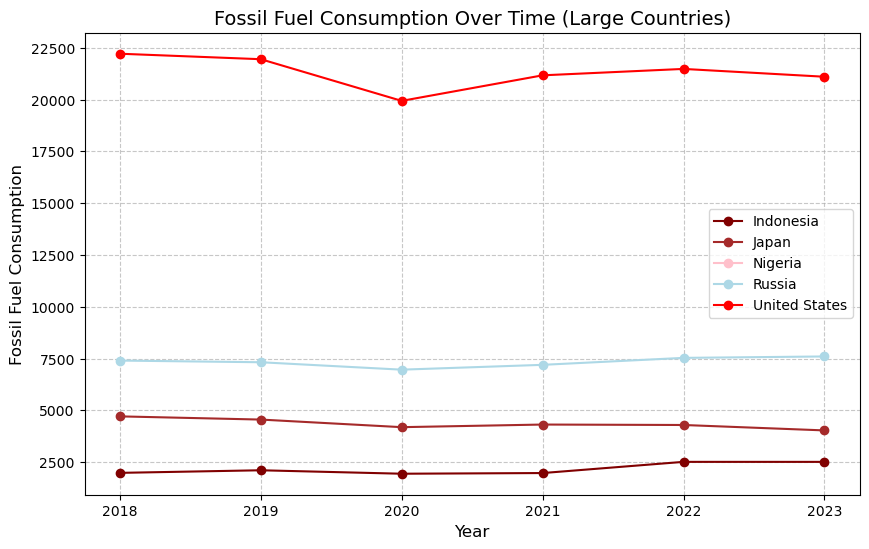

In [68]:
# Plot greenhouse gas emissions for selected large countries

#Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(indonesia_line["year"], indonesia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='maroon', label="Indonesia")
plt.plot(japan_line["year"], japan_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='brown', label="Japan")
plt.plot(nigeria_line["year"], nigeria_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='pink', label="Nigeria")
plt.plot(russia_line["year"], russia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='lightblue', label="Russia")  
plt.plot(united_states_line["year"], united_states_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='red', label="United States")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Fossil Fuel Consumption", fontsize=12)
plt.title("Fossil Fuel Consumption Over Time (Large Countries)", fontsize=14)  

# Legend and grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7) 

# Save figure as PNG
plt.savefig("line_plot_fossil_fuel_consumption_large_countries_data.png")

# Sow plot
plt.show()

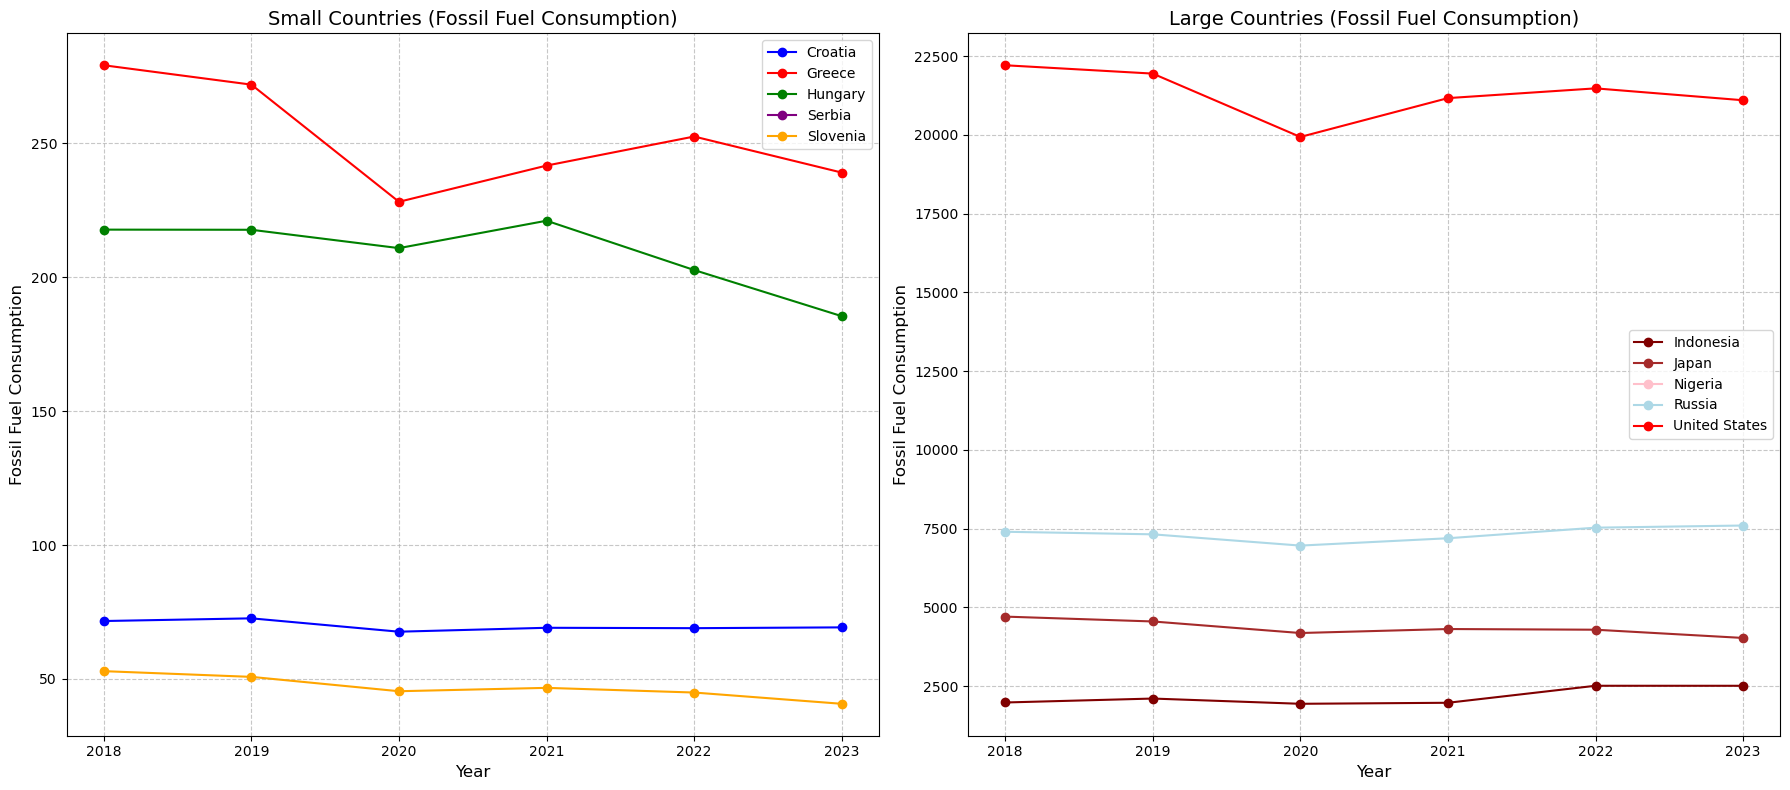

In [69]:
# Set up the figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  

# Plot data for small countries on the first subplot (axes[0])
axes[0].plot(croatia_line["year"], croatia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='blue', label="Croatia")
axes[0].plot(greece_line["year"], greece_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='red', label="Greece")
axes[0].plot(hungary_line["year"], hungary_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='green', label="Hungary")
axes[0].plot(serbia_line["year"], serbia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='purple', label="Serbia")
axes[0].plot(slovenia_line["year"], slovenia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='orange', label="Slovenia")
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Fossil Fuel Consumption", fontsize=12)
axes[0].set_title("Small Countries (Fossil Fuel Consumption)", fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.7)  

# Plot data for large countries on the second subplot (axes[1])
axes[1].plot(indonesia_line["year"], indonesia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='maroon', label="Indonesia")
axes[1].plot(japan_line["year"], japan_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='brown', label="Japan")
axes[1].plot(nigeria_line["year"], nigeria_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='pink', label="Nigeria")
axes[1].plot(russia_line["year"], russia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='lightblue', label="Russia")
axes[1].plot(united_states_line["year"], united_states_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='red', label="United States")
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Fossil Fuel Consumption", fontsize=12)
axes[1].set_title("Large Countries (Fossil Fuel Consumption)", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("line_plot_fossil_fuel_consumption_large_and_small_countries_side_by_side.png")
plt.show()

In [70]:
# Filter greenhouse gas emissions data for selected small countries
#The result is assigned to the "country"_line variable.
slovenia_line = small_countries_df[small_countries_df["country"] == "Slovenia"][["country", "year", "electricity_generation"]]
serbia_line = small_countries_df[small_countries_df["country"] == "Serbia"][["country", "year", "electricity_generation"]]
greece_line = small_countries_df[small_countries_df["country"] == "Greece"][["country", "year", "electricity_generation"]]
hungary_line = small_countries_df[small_countries_df["country"] == "Hungary"][["country", "year", "electricity_generation"]]
croatia_line = small_countries_df[small_countries_df["country"] == "Croatia"][["country", "year", "electricity_generation"]]

# Display first few rows to verify data for each country
print("Slovenia Data:\n", slovenia_line.head(), "\n")
print("Serbia Data:\n", serbia_line.head(), "\n")
print("Greece Data:\n", greece_line.head(), "\n")
print("Hungary Data:\n", hungary_line.head(), "\n")
print("Croatia Data:\n", croatia_line.head(), "\n")

Slovenia Data:
         country  year  electricity_generation
17507  Slovenia  2018                   16.12
17508  Slovenia  2019                   15.89
17509  Slovenia  2020                   16.89
17510  Slovenia  2021                   15.59
17511  Slovenia  2022                   13.36 

Serbia Data:
       country  year  electricity_generation
17255  Serbia  2018                   37.42
17256  Serbia  2019                   37.60
17257  Serbia  2020                   37.95
17258  Serbia  2021                   38.23
17259  Serbia  2022                   35.95 

Greece Data:
      country  year  electricity_generation
8243  Greece  2018                   52.61
8244  Greece  2019                   47.95
8245  Greece  2020                   47.51
8246  Greece  2021                   54.24
8247  Greece  2022                   51.61 

Hungary Data:
       country  year  electricity_generation
9140  Hungary  2018                   32.05
9141  Hungary  2019                   34.28
9142 

In [ ]:
# Plot electricity generation for selected small countries

# Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(croatia_line["year"], croatia_line["electricity_generation"], marker='o', linestyle='-', color='blue', label="Croatia")
plt.plot(greece_line["year"], greece_line["electricity_generation"], marker='o', linestyle='-', color='red', label="Greece")
plt.plot(hungary_line["year"], hungary_line["electricity_generation"], marker='o', linestyle='-', color='green', label="Hungary")
plt.plot(serbia_line["year"], serbia_line["electricity_generation"], marker='o', linestyle='-', color='purple', label="Serbia")
plt.plot(slovenia_line["year"], slovenia_line["electricity_generation"], marker='o', linestyle='-', color='orange', label="Slovenia")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Electricity Generation")
plt.title("Electricity Generation Over Time (Small Countries)")

# Legend and grid
plt.legend()
plt.grid(True)

# Save figure as PNG
plt.savefig("line_plot_electricity_generation_small_countries_data.png")

# Show plot
plt.show()

In [71]:
# Filter greenhouse gas emissions data for selected large countries
#The result is assigned to the "country"_line variable.
indonesia_line = large_countries_df[large_countries_df["country"] == "Indonesia"][["country", "year", "electricity_generation"]]
japan_line = large_countries_df[large_countries_df["country"] == "Japan"][["country", "year", "electricity_generation"]]
nigeria_line = large_countries_df[large_countries_df["country"] == "Nigeria"][["country", "year", "electricity_generation"]]
russia_line = large_countries_df[large_countries_df["country"] == "Russia"][["country", "year", "electricity_generation"]]
united_states_line = large_countries_df[large_countries_df["country"] == "United States"][["country", "year", "electricity_generation"]]

# Display first few rows to verify data for each country
print("Indonesia Data:\n", indonesia_line.head(), "\n")
print("Japan Data:\n", japan_line.head(), "\n")
print("Nigeria Data:\n", nigeria_line.head(), "\n")
print("Russia Data:\n", russia_line.head(), "\n")
print("United States Data:\n", united_states_line.head(), "\n")

Indonesia Data:
         country  year  electricity_generation
9447  Indonesia  2018                  283.79
9448  Indonesia  2019                  295.44
9449  Indonesia  2020                  291.82
9450  Indonesia  2021                  309.36
9451  Indonesia  2022                  333.54 

Japan Data:
       country  year  electricity_generation
10234   Japan  2018                 1053.18
10235   Japan  2019                 1025.78
10236   Japan  2020                  996.96
10237   Japan  2021                 1019.71
10238   Japan  2022                 1033.55 

Nigeria Data:
        country  year  electricity_generation
13779  Nigeria  2018                   33.41
13780  Nigeria  2019                   33.12
13781  Nigeria  2020                   35.07
13782  Nigeria  2021                   36.06
13783  Nigeria  2022                   36.98 

Russia Data:
       country  year  electricity_generation
16711  Russia  2018                 1109.19
16712  Russia  2019                 1

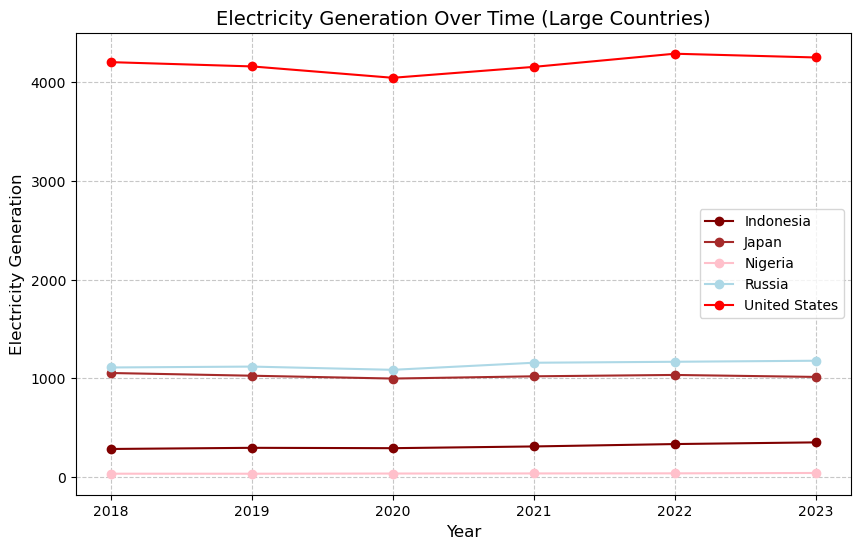

In [72]:
# Plot greenhouse gas emissions for selected large countries

#Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(indonesia_line["year"], indonesia_line["electricity_generation"], marker='o', linestyle='-', color='maroon', label="Indonesia")
plt.plot(japan_line["year"], japan_line["electricity_generation"], marker='o', linestyle='-', color='brown', label="Japan")
plt.plot(nigeria_line["year"], nigeria_line["electricity_generation"], marker='o', linestyle='-', color='pink', label="Nigeria")
plt.plot(russia_line["year"], russia_line["electricity_generation"], marker='o', linestyle='-', color='lightblue', label="Russia")  
plt.plot(united_states_line["year"], united_states_line["electricity_generation"], marker='o', linestyle='-', color='red', label="United States")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Electricity Generation", fontsize=12)
plt.title("Electricity Generation Over Time (Large Countries)", fontsize=14)  

# Legend and grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7) 

# Save figure as PNG
plt.savefig("line_plot_electricity_generation_large_countries_data.png")

# Sow plot
plt.show()

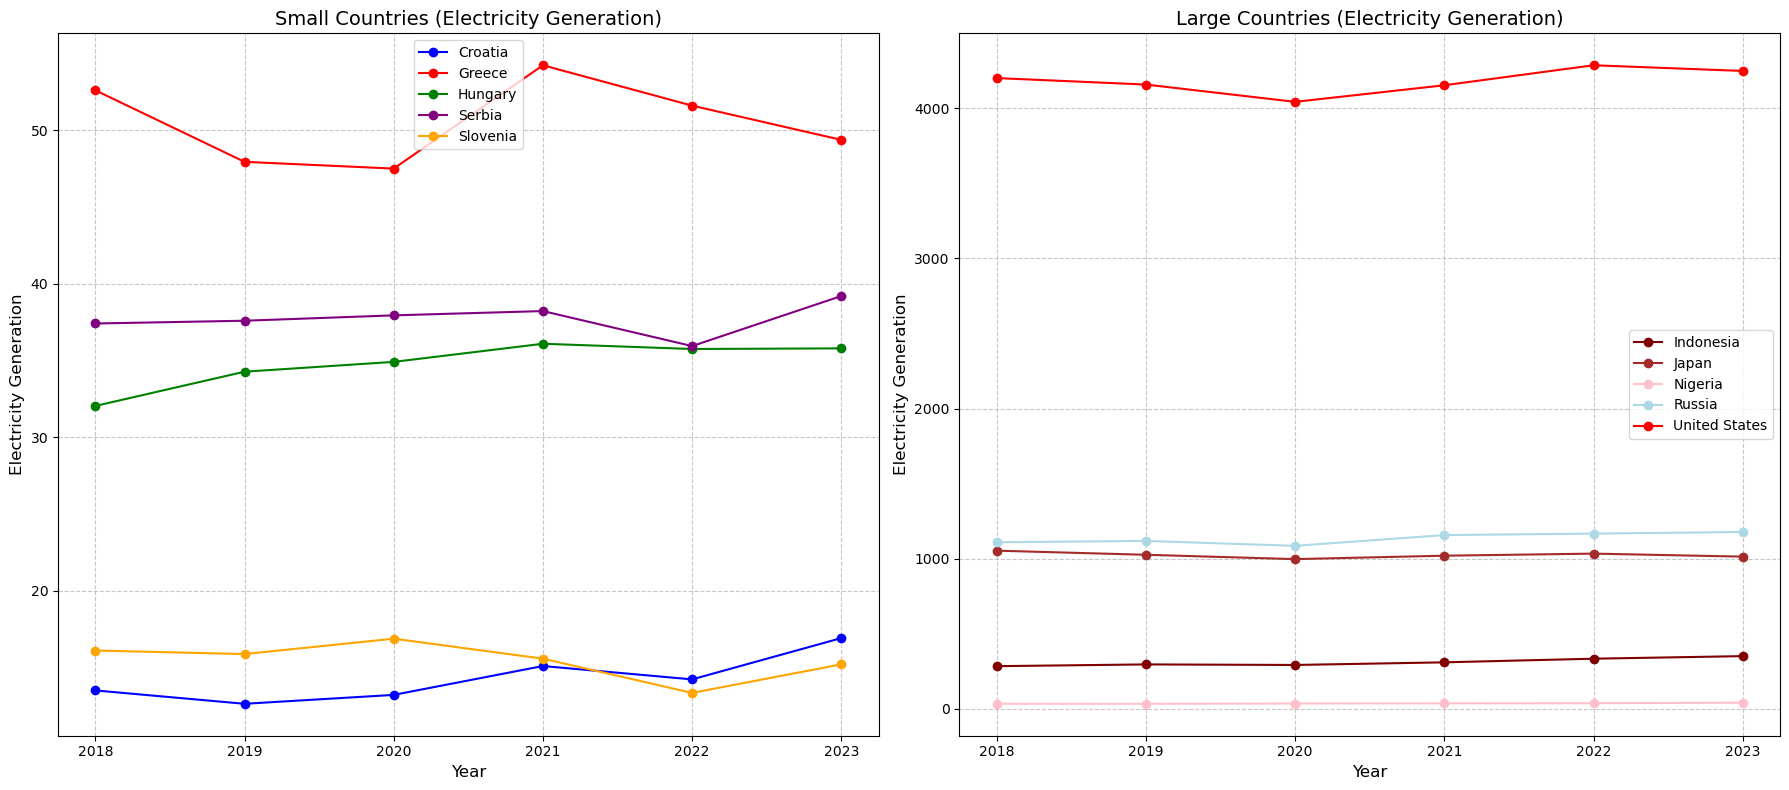

In [73]:
# Set up the figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  

# Plot data for small countries on the first subplot (axes[0])
axes[0].plot(croatia_line["year"], croatia_line["electricity_generation"], marker='o', linestyle='-', color='blue', label="Croatia")
axes[0].plot(greece_line["year"], greece_line["electricity_generation"], marker='o', linestyle='-', color='red', label="Greece")
axes[0].plot(hungary_line["year"], hungary_line["electricity_generation"], marker='o', linestyle='-', color='green', label="Hungary")
axes[0].plot(serbia_line["year"], serbia_line["electricity_generation"], marker='o', linestyle='-', color='purple', label="Serbia")
axes[0].plot(slovenia_line["year"], slovenia_line["electricity_generation"], marker='o', linestyle='-', color='orange', label="Slovenia")
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Electricity Generation", fontsize=12)
axes[0].set_title("Small Countries (Electricity Generation)", fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.7)  

# Plot data for large countries on the second subplot (axes[1])
axes[1].plot(indonesia_line["year"], indonesia_line["electricity_generation"], marker='o', linestyle='-', color='maroon', label="Indonesia")
axes[1].plot(japan_line["year"], japan_line["electricity_generation"], marker='o', linestyle='-', color='brown', label="Japan")
axes[1].plot(nigeria_line["year"], nigeria_line["electricity_generation"], marker='o', linestyle='-', color='pink', label="Nigeria")
axes[1].plot(russia_line["year"], russia_line["electricity_generation"], marker='o', linestyle='-', color='lightblue', label="Russia")
axes[1].plot(united_states_line["year"], united_states_line["electricity_generation"], marker='o', linestyle='-', color='red', label="United States")
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Electricity Generation", fontsize=12)
axes[1].set_title("Large Countries (Electricity Generation)", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("line_plot_electricity_generation_large_and_small_countries_side_by_side.png")
plt.show()

Correlation Coefficient (R-value): 0.57


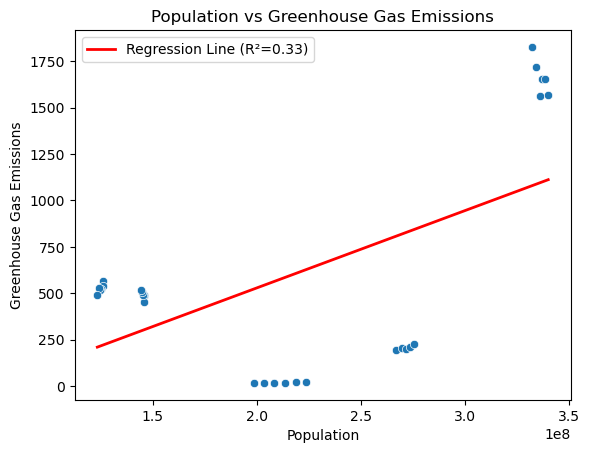

In [78]:
#Clean the date and ensure there are no NaN values in the population and greenhouse_gas_emissions columns
large_countries_df_clean = large_countries_df.dropna(subset=["population", "greenhouse_gas_emissions"])

# Extract data for linear regression(Assigns the population data to x (independent variable) and the greenhouse gas emissions data to y(dependent variable).
x = large_countries_df_clean["population"]
y = large_countries_df_clean["greenhouse_gas_emissions"]

# Perform linear regression using linregress (linregress from SciPy is used to calculate the slope, intercept, r-value (correlation coefficient), p-value, and standard error of the regression line.)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Check if r_value is NaN (This checks if the r-value (correlation coefficient) is NaN (not a number), which would indicate issues with the data. Otherwise, it prints the r-value.)
if np.isnan(r_value):
    print("R-value is NaN, check the data for issues.")
else:
    print(f"Correlation Coefficient (R-value): {r_value:.2f}")

# Create regression line points for plotting (Generates 100 evenly spaced points between the minimum and maximum values of the population to plot a smooth regression line.)
x_pred = np.linspace(x.min(), x.max(), 100)  
y_pred = slope * x_pred + intercept

# Plot scatter plot (Creates a scatter plot of the population vs. greenhouse gas emissions.)
sns.scatterplot(x=x, y=y)
plt.xlabel("Population")
plt.ylabel("Greenhouse Gas Emissions")
plt.title("Population vs Greenhouse Gas Emissions")

# Plot regression line (Adds the regression line to the plot, which represents the relationship between population and greenhouse gas emissions.
# The R² value is included in the label of the line (coefficient of determination).)

plt.plot(x_pred, y_pred, color="red", linewidth=2, label=f"Regression Line (R²={r_value**2:.2f})")

# Show the plot with regression line
plt.legend()
plt.savefig("population_vs_ghg_emissions_large_countries.png")
plt.show()

Correlation Coefficient (R-value): 0.60


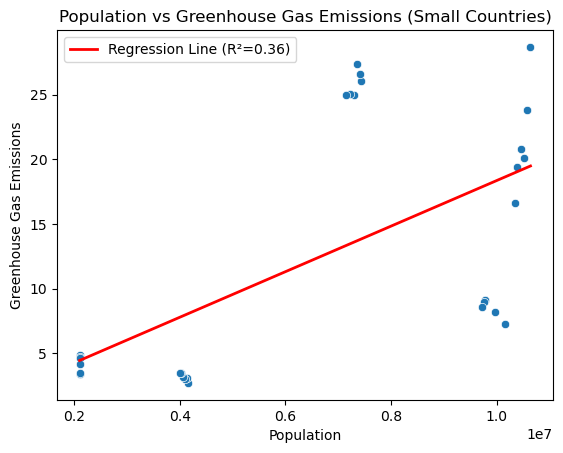

In [79]:
#Clean the date and ensure there are no NaN values in the population and greenhouse_gas_emissions columns
small_countries_df_clean = small_countries_df.dropna(subset=["population", "greenhouse_gas_emissions"])

# Extract data for linear regression(Assigns the population data to x (independent variable) and the greenhouse gas emissions data to y(dependent variable).
x = small_countries_df_clean["population"]
y = small_countries_df_clean["greenhouse_gas_emissions"]

# Perform linear regression using linregress (linregress from SciPy is used to calculate the slope, intercept, r-value (correlation coefficient), p-value, and standard error of the regression line.)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Check if r_value is NaN (This checks if the r-value (correlation coefficient) is NaN (not a number), which would indicate issues with the data. Otherwise, it prints the r-value.)
if np.isnan(r_value):
    print("R-value is NaN, check the data for issues.")
else:
    print(f"Correlation Coefficient (R-value): {r_value:.2f}")

# Create regression line points for plotting (Generates 100 evenly spaced points between the minimum and maximum values of the population to plot a smooth regression line.)
x_pred = np.linspace(x.min(), x.max(), 100)  
y_pred = slope * x_pred + intercept

#(Create a scatter plot of the population vs. greenhouse gas emissions.)
sns.scatterplot(x=x, y=y)
plt.xlabel("Population")
plt.ylabel("Greenhouse Gas Emissions")
plt.title("Population vs Greenhouse Gas Emissions (Small Countries)")

# Plot regression line (Adds the regression line to the plot, which represents the relationship between population and greenhouse gas emissions.
# The R² value is included in the label of the line (coefficient of determination).)
plt.plot(x_pred, y_pred, color="red", linewidth=2, label=f"Regression Line (R²={r_value**2:.2f})")

# Show the plot with regression line
plt.legend()
plt.savefig("population_vs_ghg_emissions_small_countries.png")
plt.show()

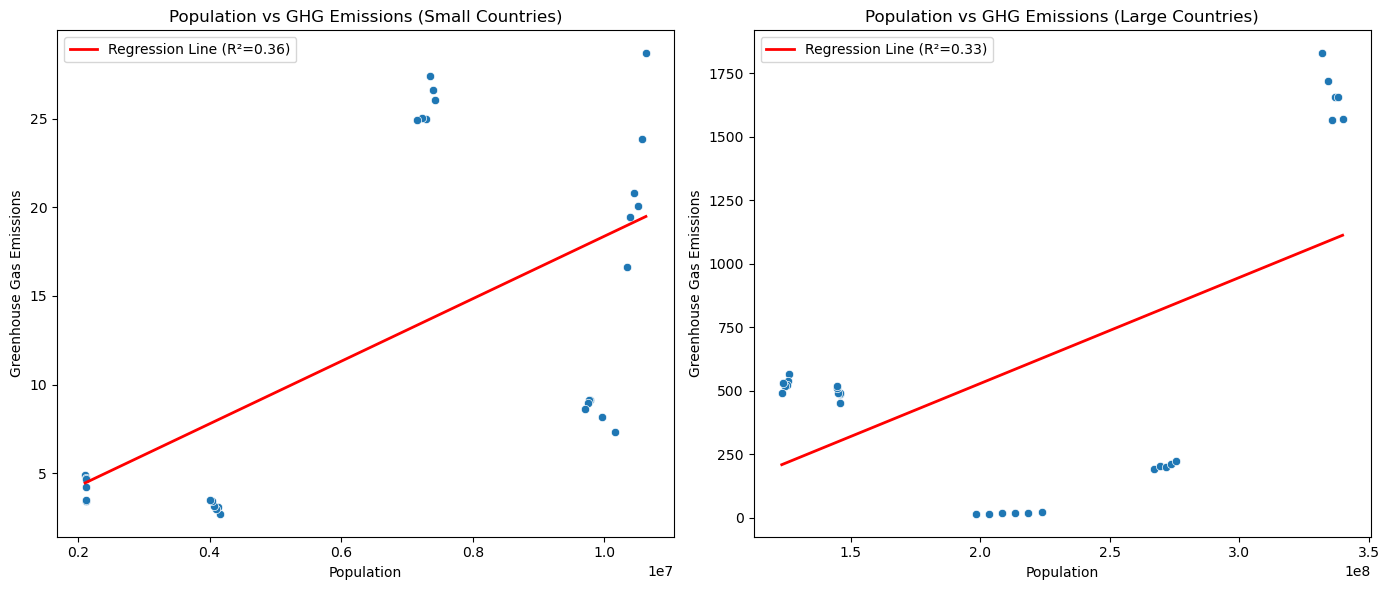

In [80]:
# Ensure there are no NaN values in the population and greenhouse_gas_emissions columns
small_countries_df_clean = small_countries_df.dropna(subset=["population", "greenhouse_gas_emissions"])

# Extract data for linear regression
x_small = small_countries_df_clean["population"]
y_small = small_countries_df_clean["greenhouse_gas_emissions"]

# Perform linear regression using linregress
slope_small, intercept_small, r_value_small, _, _ = linregress(x_small, y_small)

# Create regression line points for small countries
x_pred_small = np.linspace(x_small.min(), x_small.max(), 100)
y_pred_small = slope_small * x_pred_small + intercept_small

# Ensure there are no NaN values in the population and greenhouse_gas_emissions columns for large countries
large_countries_df_clean = large_countries_df.dropna(subset=["population", "greenhouse_gas_emissions"])

# Extract data for linear regression
x_large = large_countries_df_clean["population"]
y_large = large_countries_df_clean["greenhouse_gas_emissions"]

# Perform linear regression using linregress
slope_large, intercept_large, r_value_large, _, _ = linregress(x_large, y_large)

# Create regression line points for large countries
x_pred_large = np.linspace(x_large.min(), x_large.max(), 100)
y_pred_large = slope_large * x_pred_large + intercept_large

# Create subplots (side by side)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Small countries plot
sns.scatterplot(x=x_small, y=y_small, ax=ax[0])
ax[0].plot(x_pred_small, y_pred_small, color="red", linewidth=2, label=f"Regression Line (R²={r_value_small**2:.2f})")
ax[0].set_xlabel("Population")
ax[0].set_ylabel("Greenhouse Gas Emissions")
ax[0].set_title("Population vs GHG Emissions (Small Countries)")
ax[0].legend()

# Large countries plot
sns.scatterplot(x=x_large, y=y_large, ax=ax[1])
ax[1].plot(x_pred_large, y_pred_large, color="red", linewidth=2, label=f"Regression Line (R²={r_value_large**2:.2f})")
ax[1].set_xlabel("Population")
ax[1].set_ylabel("Greenhouse Gas Emissions")
ax[1].set_title("Population vs GHG Emissions (Large Countries)")
ax[1].legend()

# Show the plot side by side
plt.tight_layout()
plt.savefig("population_vs_ghg_emission_combined")
plt.show()